# Status + LTD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import lines
import pandas as pd
import scipy.special
from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf
import networkx as nx
import os

import matplotlib as mpl

In [2]:
wiki_path = Path('/home/pgorski/Desktop/data/wikielections/wikielections_triads.h5')
slash_path = Path('/home/pgorski/Desktop/data/slashdot/slashdot_triads.h5')
epinions_path_csv = Path('/home/pgorski/Desktop/data/epinions/epinions_triads.csv')
epinions_path = Path('/home/pgorski/Desktop/data/epinions/epinions_triads.h5')

dutch_path_csv = Path('/home/pgorski/Desktop/data/dutch-college/dutch_triads.csv')
dutch_path_pkl = Path('/home/pgorski/Desktop/data/dutch-college/out.moreno_vdb_vdb_triads_classes_.pkl')

sampson_path_pkl = Path('/home/pgorski/Desktop/data/sampson/out.moreno_sampson_sampson_triads_classes_.pkl')
bitalpha_path_pkl = Path('/home/pgorski/Desktop/data/bitcoin-alpha/bitcoinAlpha_triads_classes.pkl')
bitotc_path_pkl = Path('/home/pgorski/Desktop/data/bitcoin-otc/bitcoinOTC_triads_classes.pkl')

bitalpha_path_csv = Path('/home/pgorski/Desktop/data/bitcoin-alpha/bit_alpha.csv')
bitotc_path_csv = Path('/home/pgorski/Desktop/data/bitcoin-otc/bit_otc.csv')
sampson_path_csv = Path('/home/pgorski/Desktop/data/sampson/sampson.csv')

convote_path_pkl = Path('/home/pgorski/Desktop/data/convote/convote_triads_classes.pkl')
stock_path_pkl = Path('/home/pgorski/Desktop/data/stock-data-giacomo/edges_stocks.pickle_triads_classes_.pkl')

# Stock data

In [7]:
n_arr_st2 = pd.read_pickle(stock_path_pkl)
n_arr_st2

[array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 909,   53,   39, 1198, 2650,  136,  175, 3321])]

In [8]:
n_arr_st = n_arr_st2[1]

return_dict_st = {}
for i in range(8):
    return_dict_st[f'Tr{i}'] = n_arr_st[i]
    return_dict_st[f'tr{i}'] = n_arr_st[i] / sum(n_arr_st)

return_dict_st['T'] = sum(n_arr_st)
return_dict_st['L_plus'] = 0#sum(np.array(list(elist.values())) > 0)
return_dict_st['L'] = 0#len(elist)
return_dict_st['rho'] = 0#sum(np.array(list(elist.values())) > 0) / len(elist)

return_dict_st

{'Tr0': 909,
 'tr0': 0.10718075698620445,
 'Tr1': 53,
 'tr1': 0.00624926305860158,
 'Tr2': 39,
 'tr2': 0.004598514326140785,
 'Tr3': 1198,
 'tr3': 0.14125692724914515,
 'Tr4': 2650,
 'tr4': 0.312463152930079,
 'Tr5': 136,
 'tr5': 0.016035844829619148,
 'Tr6': 175,
 'tr6': 0.020634359155759934,
 'Tr7': 3321,
 'tr7': 0.3915811814644499,
 'T': 8481,
 'L_plus': 0,
 'L': 0,
 'rho': 0}

In [9]:
results_realnet2['stock'] = pd.Series(return_dict_st)
results_realnet2

,wiki elections,slashdot,epinions,sampson,bitcoin-alpha,bitcoin-otc,Congress mentions,stock
tr0,0.012461,1.236096e-02,7.488967e-03,0.108808,0.003380,0.004742,0.000000,0.107181
tr1,0.027505,5.186732e-02,2.700950e-02,0.135579,0.010715,0.031147,0.128114,0.006249
tr2,0.010724,1.451844e-02,4.778784e-03,0.128670,0.006197,0.011741,0.103203,0.004599
tr3,0.072158,2.477065e-02,1.890176e-02,0.107945,0.043627,0.037097,0.021352,0.141257
tr4,0.049625,2.027677e-02,2.477050e-02,0.194301,0.028078,0.034881,0.092527,0.312463
tr5,0.065085,2.038621e-02,1.184566e-02,0.083765,0.032912,0.029805,0.010676,0.016036
tr6,0.077725,2.977175e-02,2.997776e-02,0.081174,0.034196,0.030845,0.003559,0.020634
tr7,0.684716,8.260479e-01,8.752271e-01,0.159758,0.840896,0.819742,0.640569,0.391581
T,745129.000000,1.251925e+06,1.096199e+07,1158.000000,88753.000000,125886.000000,281.000000,8481.000000
L_plus,75446.000000,2.213970e+05,5.830880e+05,0.000000,15739.000000,22098.000000,0.000000,0.000000


# Congress mentions

In [122]:
n_arr_c2 = pd.read_pickle(convote_path_pkl)
v = n_arr_c2[0]
counts = n_arr_c2[1]

triads_stats = [0 for i in range(8)]
for k, i in enumerate(v):
    triads_stats[i] = counts[k]
triads_stats
# n_arr_c2

[0, 36, 29, 6, 26, 3, 1, 180]

In [123]:
n_arr_c = triads_stats

return_dict_c = {}
for i in range(8):
    # if i in n_arr_d2[0]:
    return_dict_c[f'Tr{i}'] = n_arr_c[i]
    return_dict_c[f'tr{i}'] = n_arr_c[i] / sum(n_arr_c)
    # else:
    #     return_dict_d[f'Tr{i}'] = 0
    #     return_dict_d[f'tr{i}'] = 0.

return_dict_c['T'] = sum(n_arr_c)
return_dict_c['L_plus'] = 0#sum(np.array(list(elist.values())) > 0)
return_dict_c['L'] = 0#len(elist)
return_dict_c['rho'] = 0#sum(np.array(list(elist.values())) > 0) / len(elist)

return_dict_c

{'Tr0': 0,
 'tr0': 0.0,
 'Tr1': 36,
 'tr1': 0.12811387900355872,
 'Tr2': 29,
 'tr2': 0.10320284697508897,
 'Tr3': 6,
 'tr3': 0.021352313167259787,
 'Tr4': 26,
 'tr4': 0.09252669039145907,
 'Tr5': 3,
 'tr5': 0.010676156583629894,
 'Tr6': 1,
 'tr6': 0.0035587188612099642,
 'Tr7': 180,
 'tr7': 0.6405693950177936,
 'T': 281,
 'L_plus': 0,
 'L': 0,
 'rho': 0}

In [124]:
results_realnet2['Congress entions'] = pd.Series(return_dict_c)
results_realnet2

,wiki elections,slashdot,epinions,sampson,bitcoin-alpha,bitcoin-otc,Congress mentions
tr0,0.012461,1.236096e-02,7.488967e-03,0.108808,0.003380,0.004742,0.000000
tr1,0.027505,5.186732e-02,2.700950e-02,0.135579,0.010715,0.031147,0.128114
tr2,0.010724,1.451844e-02,4.778784e-03,0.128670,0.006197,0.011741,0.103203
tr3,0.072158,2.477065e-02,1.890176e-02,0.107945,0.043627,0.037097,0.021352
tr4,0.049625,2.027677e-02,2.477050e-02,0.194301,0.028078,0.034881,0.092527
tr5,0.065085,2.038621e-02,1.184566e-02,0.083765,0.032912,0.029805,0.010676
tr6,0.077725,2.977175e-02,2.997776e-02,0.081174,0.034196,0.030845,0.003559
tr7,0.684716,8.260479e-01,8.752271e-01,0.159758,0.840896,0.819742,0.640569
T,745129.000000,1.251925e+06,1.096199e+07,1158.000000,88753.000000,125886.000000,281.000000
L_plus,75446.000000,2.213970e+05,5.830880e+05,0.000000,0.000000,0.000000,0.000000


# Dutch

In [53]:
n_arr_d2 = pd.read_pickle(dutch_path_pkl)
v = n_arr_d2[0]
counts = n_arr_d2[1]

triads_stats = [0 for i in range(8)]
for k, i in enumerate(v):
    triads_stats[i] = counts[k]
triads_stats

[0, 0, 0, 4, 0, 4, 6, 1052]

In [56]:
n_arr_d = triads_stats

return_dict_d = {}
for i in range(8):
    # if i in n_arr_d2[0]:
    return_dict_d[f'Tr{i}'] = n_arr_d[i]
    return_dict_d[f'tr{i}'] = n_arr_d[i] / sum(n_arr_d)
    # else:
    #     return_dict_d[f'Tr{i}'] = 0
    #     return_dict_d[f'tr{i}'] = 0.

return_dict_d['T'] = sum(n_arr_d)
return_dict_d['L_plus'] = 0#sum(np.array(list(elist.values())) > 0)
return_dict_d['L'] = 0#len(elist)
return_dict_d['rho'] = 0#sum(np.array(list(elist.values())) > 0) / len(elist)

return_dict_d

{'Tr0': 0,
 'tr0': 0.0,
 'Tr1': 0,
 'tr1': 0.0,
 'Tr2': 0,
 'tr2': 0.0,
 'Tr3': 4,
 'tr3': 0.00375234521575985,
 'Tr4': 0,
 'tr4': 0.0,
 'Tr5': 4,
 'tr5': 0.00375234521575985,
 'Tr6': 6,
 'tr6': 0.005628517823639775,
 'Tr7': 1052,
 'tr7': 0.9868667917448405,
 'T': 1066,
 'L_plus': 0,
 'L': 0,
 'rho': 0}

# Bitcoin

In [139]:
bitotc_tr = pd.read_csv(bitotc_path_csv)
bitalpha_tr = pd.read_csv(bitalpha_path_csv)

In [140]:
bo_all_nodes = np.unique([*bitotc_tr.a, *bitotc_tr.b, *bitotc_tr.c])
bo_a_nodes = np.unique(bitotc_tr.a)

ba_all_nodes = np.unique([*bitalpha_tr.a, *bitalpha_tr.b, *bitalpha_tr.c])
ba_a_nodes = np.unique(bitalpha_tr.a)

len(bo_all_nodes), len(bo_a_nodes), len(ba_all_nodes), len(ba_a_nodes)

(2613, 2125, 1718, 1466)

In [141]:
ba_orig_agents_to_new_inds_dict = {key: val for key, val in zip(ba_all_nodes, list(range(0,len(ba_all_nodes))))}

ba_n_agents = len(ba_all_nodes)
elist_ba = {}

every = 0.1
start = every
it = 0.
rows = len(bitalpha_tr.index)
for ind, row in bitalpha_tr.iterrows():
    ags = [row.a, row.b, row.c]
    ags = [ba_orig_agents_to_new_inds_dict[ag] for ag in ags]
    links = [[ags[0], ags[1]], [ags[0], ags[2]], [ags[1], ags[2]] ]
    pols = [row.ab, row.ac, row.bc]
    for link, pol in zip(links, pols):
        elist_ba[(link[0], link[1])] = pol
    
    if it / rows > start:
        start += every
        print("Finished " + str(it/rows * 100) + "%.")
    it += 1
elist_ba

Finished 10.000788705733891%.
Finished 20.000450688990796%.
Finished 30.0001126722477%.
Finished 40.00090137798159%.
Finished 50.00056336123849%.
Finished 60.0002253444954%.
Finished 70.00101405022929%.
Finished 80.0006760334862%.
Finished 90.0003380167431%.


{(0, 2): 1,
 (0, 65): 1,
 (2, 65): 1,
 (0, 98): 1,
 (2, 98): 1,
 (0, 4): 1,
 (0, 8): 1,
 (4, 8): 1,
 (0, 25): 1,
 (4, 25): 1,
 (0, 26): 1,
 (4, 26): 1,
 (0, 144): 1,
 (4, 144): 1,
 (0, 5): 1,
 (5, 2): -1,
 (0, 30): 1,
 (5, 30): 1,
 (0, 41): 1,
 (5, 41): 1,
 (0, 52): 1,
 (5, 52): 1,
 (0, 81): 1,
 (5, 81): 1,
 (0, 83): 1,
 (5, 83): 1,
 (0, 96): 1,
 (5, 96): 1,
 (0, 105): 1,
 (5, 105): 1,
 (0, 120): 1,
 (5, 120): 1,
 (0, 146): 1,
 (5, 146): 1,
 (0, 162): 1,
 (5, 162): -1,
 (0, 168): 1,
 (5, 168): 1,
 (0, 174): 1,
 (5, 174): 1,
 (0, 179): 1,
 (5, 179): 1,
 (0, 191): 1,
 (5, 191): 1,
 (0, 232): 1,
 (5, 232): 1,
 (0, 277): 1,
 (5, 277): 1,
 (0, 7): 1,
 (0, 119): 1,
 (7, 119): 1,
 (8, 4): 1,
 (0, 23): 1,
 (8, 23): 1,
 (0, 36): 1,
 (8, 36): 1,
 (0, 39): 1,
 (8, 39): 1,
 (0, 76): 1,
 (8, 76): 1,
 (0, 97): 1,
 (8, 97): 1,
 (8, 120): 1,
 (0, 152): 1,
 (8, 152): 1,
 (8, 162): 1,
 (8, 191): 1,
 (0, 227): 1,
 (8, 227): 1,
 (0, 247): 1,
 (8, 247): 1,
 (0, 254): 1,
 (8, 254): 1,
 (8, 277): 1,
 (0, 10)

In [134]:
bo_orig_agents_to_new_inds_dict = {key: val for key, val in zip(bo_all_nodes, list(range(0,len(bo_all_nodes))))}

bo_n_agents = len(bo_all_nodes)
elist = {}

every = 0.1
start = every
it = 0.
rows = len(bitotc_tr.index)
for ind, row in bitotc_tr.iterrows():
    ags = [row.a, row.b, row.c]
    ags = [bo_orig_agents_to_new_inds_dict[ag] for ag in ags]
    links = [[ags[0], ags[1]], [ags[0], ags[2]], [ags[1], ags[2]] ]
    pols = [row.ab, row.ac, row.bc]
    for link, pol in zip(links, pols):
        elist[(link[0], link[1])] = pol
    
    if it / rows > start:
        start += every
        print("Finished " + str(it/rows * 100) + "%.")
    it += 1
elist

Finished 10.000317747803567%.
Finished 20.000635495607135%.
Finished 30.000158873901782%.
Finished 40.00047662170535%.
Finished 50.00079436950892%.
Finished 60.000317747803564%.
Finished 70.00063549560713%.
Finished 80.00015887390178%.
Finished 90.00047662170535%.


{(0, 1): 1,
 (0, 3): 1,
 (1, 3): 1,
 (0, 5): 1,
 (1, 5): 1,
 (0, 9): 1,
 (1, 9): 1,
 (0, 117): 1,
 (1, 117): 1,
 (0, 596): 1,
 (1, 596): 1,
 (0, 2): 1,
 (2, 3): 1,
 (2, 9): 1,
 (3, 1): 1,
 (3, 2): 1,
 (3, 5): 1,
 (0, 8): 1,
 (3, 8): 1,
 (3, 9): 1,
 (0, 20): 1,
 (3, 20): 1,
 (0, 22): 1,
 (3, 22): 1,
 (0, 63): 1,
 (3, 63): 1,
 (0, 133): 1,
 (3, 133): 1,
 (0, 214): 1,
 (3, 214): 1,
 (0, 304): 1,
 (3, 304): 1,
 (0, 578): 1,
 (3, 578): 1,
 (3, 596): 1,
 (0, 603): -1,
 (3, 603): -1,
 (0, 627): 1,
 (3, 627): 1,
 (0, 688): 1,
 (3, 688): 1,
 (0, 809): 1,
 (3, 809): 1,
 (0, 913): 1,
 (3, 913): 1,
 (0, 1115): 1,
 (3, 1115): 1,
 (0, 1216): 1,
 (3, 1216): 1,
 (5, 1): 1,
 (5, 3): 1,
 (5, 9): 1,
 (5, 22): 1,
 (5, 304): 1,
 (5, 627): 1,
 (5, 688): 1,
 (8, 1): 1,
 (8, 3): 1,
 (9, 1): 1,
 (9, 2): 1,
 (9, 3): 1,
 (9, 5): 1,
 (9, 22): 1,
 (9, 117): 1,
 (9, 133): 1,
 (0, 175): 1,
 (9, 175): 1,
 (9, 304): 1,
 (9, 578): 1,
 (9, 627): 1,
 (0, 914): 1,
 (9, 914): 1,
 (20, 3): 1,
 (22, 3): 1,
 (22, 9): 1,
 (22,

In [135]:
len(elist), sum(np.array(list(elist.values())) > 0), sum(np.array(list(elist.values())) < 0)

(24876, 22098, 2778)

In [136]:
22098/24876

0.8883260974433188

In [41]:
n_arr_ba2 = pd.read_pickle(bitalpha_path_pkl)
n_arr_bo2 = pd.read_pickle(bitotc_path_pkl)

In [142]:
n_arr_ba = n_arr_ba2[1]

return_dict_ba = {}
for i in range(8):
    return_dict_ba[f'Tr{i}'] = n_arr_ba[i]
    return_dict_ba[f'tr{i}'] = n_arr_ba[i] / sum(n_arr_ba)

return_dict_ba['T'] = sum(n_arr_ba)
return_dict_ba['L_plus'] = sum(np.array(list(elist_ba.values())) > 0)
return_dict_ba['L'] = len(elist_ba)
return_dict_ba['rho'] = sum(np.array(list(elist_ba.values())) > 0) / len(elist_ba)

return_dict_ba

{'Tr0': 300,
 'tr0': 0.00338016743096008,
 'Tr1': 951,
 'tr1': 0.010715130756143455,
 'Tr2': 550,
 'tr2': 0.006196973623426813,
 'Tr3': 3872,
 'tr3': 0.04362669430892477,
 'Tr4': 2492,
 'tr4': 0.028077924126508398,
 'Tr5': 2921,
 'tr5': 0.03291156355278131,
 'Tr6': 3035,
 'tr6': 0.03419602717654614,
 'Tr7': 74632,
 'tr7': 0.840895519024709,
 'T': 88753,
 'L_plus': 15739,
 'L': 16973,
 'rho': 0.9272962941141814}

In [137]:
n_arr_bo = n_arr_bo2[1]

return_dict_bo = {}
for i in range(8):
    return_dict_bo[f'Tr{i}'] = n_arr_bo[i]
    return_dict_bo[f'tr{i}'] = n_arr_bo[i] / sum(n_arr_bo)

return_dict_bo['T'] = sum(n_arr_bo)
return_dict_bo['L_plus'] = sum(np.array(list(elist.values())) > 0)
return_dict_bo['L'] = len(elist)
return_dict_bo['rho'] = sum(np.array(list(elist.values())) > 0) / len(elist)

return_dict_bo

{'Tr0': 597,
 'tr0': 0.0047423859682569946,
 'Tr1': 3921,
 'tr1': 0.031147228444783376,
 'Tr2': 1478,
 'tr2': 0.011740781341848975,
 'Tr3': 4670,
 'tr3': 0.03709705606659994,
 'Tr4': 4391,
 'tr4': 0.03488076513671099,
 'Tr5': 3752,
 'tr5': 0.029804743974707275,
 'Tr6': 3883,
 'tr6': 0.030845368031393483,
 'Tr7': 103194,
 'tr7': 0.819741671035699,
 'T': 125886,
 'L_plus': 22098,
 'L': 24876,
 'rho': 0.8883260974433188}

In [143]:
results_realnet2['bitcoin-alpha'] = pd.Series(return_dict_ba)
results_realnet2['bitcoin-otc'] = pd.Series(return_dict_bo)
results_realnet2

,wiki elections,slashdot,epinions,sampson,bitcoin-alpha,bitcoin-otc,Congress mentions
tr0,0.012461,1.236096e-02,7.488967e-03,0.108808,0.003380,0.004742,0.000000
tr1,0.027505,5.186732e-02,2.700950e-02,0.135579,0.010715,0.031147,0.128114
tr2,0.010724,1.451844e-02,4.778784e-03,0.128670,0.006197,0.011741,0.103203
tr3,0.072158,2.477065e-02,1.890176e-02,0.107945,0.043627,0.037097,0.021352
tr4,0.049625,2.027677e-02,2.477050e-02,0.194301,0.028078,0.034881,0.092527
tr5,0.065085,2.038621e-02,1.184566e-02,0.083765,0.032912,0.029805,0.010676
tr6,0.077725,2.977175e-02,2.997776e-02,0.081174,0.034196,0.030845,0.003559
tr7,0.684716,8.260479e-01,8.752271e-01,0.159758,0.840896,0.819742,0.640569
T,745129.000000,1.251925e+06,1.096199e+07,1158.000000,88753.000000,125886.000000,281.000000
L_plus,75446.000000,2.213970e+05,5.830880e+05,0.000000,15739.000000,22098.000000,0.000000


# Sampson monastery analysis

In [5]:
sampson_tr = pd.read_csv(sampson_path_csv)
sampson_tr

,a,b,c,ab,bc,ac
0,1,2,3,1,1,1
1,1,2,6,1,1,1
2,1,3,2,1,1,1
3,1,3,4,1,1,1
4,1,3,8,1,-1,-1
...,...,...,...,...,...,...
1153,18,16,5,1,1,1
1154,18,16,8,1,-1,-1
1155,18,16,9,1,1,-1
1156,18,16,11,1,1,1


In [6]:
s_all_nodes = np.unique([*sampson_tr.a, *sampson_tr.b, *sampson_tr.c])
s_a_nodes = np.unique(sampson_tr.a)

len(s_all_nodes), len(s_a_nodes)

(18, 18)

In [7]:
s_orig_agents_to_new_inds_dict = {key: val for key, val in zip(s_all_nodes, list(range(0,len(s_all_nodes))))}

s_n_agents = len(s_all_nodes)
elist = {}

every = 0.1
start = every
it = 0.
rows = len(sampson_tr.index)
for ind, row in sampson_tr.iterrows():
    ags = [row.a, row.b, row.c]
    ags = [s_orig_agents_to_new_inds_dict[ag] for ag in ags]
    links = [[ags[0], ags[1]], [ags[0], ags[2]], [ags[1], ags[2]] ]
    pols = [row.ab, row.ac, row.bc]
    for link, pol in zip(links, pols):
        elist[(link[0], link[1])] = pol
    
    if it / rows > start:
        start += every
        print("Finished " + str(it/rows * 100) + "%.")
    it += 1
elist

Finished 10.01727115716753%.
Finished 20.03454231433506%.
Finished 30.05181347150259%.
Finished 40.06908462867012%.
Finished 50.086355785837654%.
Finished 60.01727115716753%.
Finished 70.03454231433506%.
Finished 80.05181347150258%.
Finished 90.06908462867013%.


{(0, 1): 1,
 (0, 2): 1,
 (1, 2): 1,
 (0, 5): 1,
 (1, 5): 1,
 (2, 1): 1,
 (0, 3): 1,
 (2, 3): 1,
 (0, 7): -1,
 (2, 7): -1,
 (0, 9): 1,
 (2, 9): 1,
 (0, 10): 1,
 (2, 10): 1,
 (0, 12): -1,
 (2, 12): -1,
 (0, 13): -1,
 (2, 13): -1,
 (3, 1): 1,
 (0, 8): 1,
 (3, 8): 1,
 (3, 10): -1,
 (5, 1): 1,
 (5, 3): -1,
 (5, 7): -1,
 (5, 8): -1,
 (5, 9): 1,
 (5, 10): 1,
 (5, 12): -1,
 (5, 13): -1,
 (7, 1): -1,
 (7, 2): 1,
 (7, 3): -1,
 (7, 8): -1,
 (7, 9): -1,
 (7, 10): 1,
 (7, 12): 1,
 (7, 13): 1,
 (8, 2): 1,
 (8, 3): 1,
 (8, 7): -1,
 (8, 9): 1,
 (8, 10): -1,
 (8, 12): -1,
 (8, 13): -1,
 (9, 2): 1,
 (9, 3): 1,
 (9, 5): 1,
 (9, 7): -1,
 (9, 8): 1,
 (9, 10): -1,
 (9, 12): -1,
 (9, 13): -1,
 (10, 3): -1,
 (10, 12): -1,
 (12, 3): -1,
 (12, 7): 1,
 (12, 9): 1,
 (12, 10): -1,
 (12, 13): 1,
 (13, 2): 1,
 (13, 3): -1,
 (13, 7): 1,
 (13, 9): -1,
 (13, 10): 1,
 (13, 12): 1,
 (1, 6): 1,
 (6, 5): 1,
 (2, 4): 1,
 (3, 4): -1,
 (2, 16): 1,
 (3, 16): -1,
 (4, 1): -1,
 (4, 3): 1,
 (4, 7): -1,
 (4, 9): 1,
 (4, 10): -1,
 

In [8]:
n_arr_sm2 = pd.read_pickle(sampson_path_pkl)

In [9]:
n_arr_sm = n_arr_sm2[1]

return_dict_sm = {}
for i in range(8):
    return_dict_sm[f'Tr{i}'] = n_arr_sm[i]
    return_dict_sm[f'tr{i}'] = n_arr_sm[i] / sum(n_arr_sm)

return_dict_sm['T'] = sum(n_arr_sm)
return_dict_sm['L_plus'] = sum(np.array(list(elist.values())) > 0)
return_dict_sm['L'] = len(elist)
return_dict_sm['rho'] = sum(np.array(list(elist.values())) > 0) / len(elist)

return_dict_sm

{'Tr0': 126,
 'tr0': 0.10880829015544041,
 'Tr1': 157,
 'tr1': 0.13557858376511225,
 'Tr2': 149,
 'tr2': 0.12867012089810018,
 'Tr3': 125,
 'tr3': 0.1079447322970639,
 'Tr4': 225,
 'tr4': 0.19430051813471502,
 'Tr5': 97,
 'tr5': 0.08376511226252159,
 'Tr6': 94,
 'tr6': 0.08117443868739206,
 'Tr7': 185,
 'tr7': 0.15975820379965458,
 'T': 1158,
 'L_plus': 97,
 'L': 184,
 'rho': 0.5271739130434783}

In [10]:
results_realnet2['sampson'] = pd.Series(return_dict_sm)
results_realnet2

,wiki elections,slashdot,epinions,sampson,bitcoin-alpha,bitcoin-otc,Congress mentions
tr0,0.012461,1.236096e-02,7.488967e-03,0.108808,0.003380,0.004742,0.000000
tr1,0.027505,5.186732e-02,2.700950e-02,0.135579,0.010715,0.031147,0.128114
tr2,0.010724,1.451844e-02,4.778784e-03,0.128670,0.006197,0.011741,0.103203
tr3,0.072158,2.477065e-02,1.890176e-02,0.107945,0.043627,0.037097,0.021352
tr4,0.049625,2.027677e-02,2.477050e-02,0.194301,0.028078,0.034881,0.092527
tr5,0.065085,2.038621e-02,1.184566e-02,0.083765,0.032912,0.029805,0.010676
tr6,0.077725,2.977175e-02,2.997776e-02,0.081174,0.034196,0.030845,0.003559
tr7,0.684716,8.260479e-01,8.752271e-01,0.159758,0.840896,0.819742,0.640569
T,745129.000000,1.251925e+06,1.096199e+07,1158.000000,88753.000000,125886.000000,281.000000
L_plus,75446.000000,2.213970e+05,5.830880e+05,97.000000,15739.000000,22098.000000,0.000000


## Dutch college analysis

In [3]:
dutch_tr = pd.read_csv(dutch_path_csv)

In [4]:
d_all_nodes = np.unique([*dutch_tr.a, *dutch_tr.b, *dutch_tr.c])
d_a_nodes = np.unique(dutch_tr.a)

len(d_all_nodes), len(d_a_nodes)

(31, 30)

In [5]:
d_orig_agents_to_new_inds_dict = {key: val for key, val in zip(d_all_nodes, list(range(0,len(d_all_nodes))))}

d_n_agents = len(d_all_nodes)
elist = {}

every = 0.1
start = every
it = 0.
rows = len(dutch_tr.index)
for ind, row in dutch_tr.iterrows():
    ags = [row.a, row.b, row.c]
    ags = [d_orig_agents_to_new_inds_dict[ag] for ag in ags]
    links = [[ags[0], ags[1]], [ags[0], ags[2]], [ags[1], ags[2]] ]
    pols = [row.ab, row.ac, row.bc]
    for link, pol in zip(links, pols):
        elist[(link[0], link[1])] = pol
    
    if it / rows > start:
        start += every
        print("Finished " + str(it/rows * 100) + "%.")
    it += 1
elist

Finished 10.037523452157599%.
Finished 20.075046904315197%.
Finished 30.0187617260788%.
Finished 40.0562851782364%.
Finished 50.093808630394%.
Finished 60.0375234521576%.
Finished 70.0750469043152%.
Finished 80.01876172607881%.
Finished 90.0562851782364%.


{(0, 1): 1,
 (0, 5): 1,
 (1, 5): 1,
 (0, 3): 1,
 (0, 4): 1,
 (3, 4): 1,
 (4, 3): 1,
 (5, 1): 1,
 (1, 2): 1,
 (1, 8): 1,
 (2, 8): 1,
 (1, 9): 1,
 (2, 9): 1,
 (1, 12): 1,
 (2, 12): 1,
 (1, 19): 1,
 (2, 19): 1,
 (1, 21): 1,
 (2, 21): 1,
 (1, 22): 1,
 (2, 22): 1,
 (1, 28): 1,
 (2, 28): 1,
 (1, 30): 1,
 (2, 30): 1,
 (5, 2): 1,
 (5, 8): 1,
 (5, 9): 1,
 (5, 12): 1,
 (5, 19): 1,
 (5, 21): 1,
 (1, 23): 1,
 (5, 23): 1,
 (5, 28): 1,
 (5, 30): 1,
 (8, 5): 1,
 (8, 9): 1,
 (8, 19): 1,
 (8, 21): 1,
 (8, 23): 1,
 (1, 25): 1,
 (8, 25): 1,
 (8, 28): 1,
 (8, 30): 1,
 (12, 2): 1,
 (12, 22): 1,
 (12, 28): 1,
 (19, 5): 1,
 (19, 8): 1,
 (19, 9): 1,
 (19, 12): 1,
 (19, 21): 1,
 (19, 23): 1,
 (19, 25): 1,
 (19, 28): 1,
 (19, 30): 1,
 (21, 2): 1,
 (21, 9): 1,
 (21, 12): 1,
 (21, 22): 1,
 (21, 30): 1,
 (22, 2): 1,
 (22, 12): 1,
 (22, 19): 1,
 (22, 21): 1,
 (23, 5): 1,
 (23, 8): 1,
 (23, 19): 1,
 (23, 28): 1,
 (23, 30): 1,
 (25, 8): 1,
 (25, 9): 1,
 (25, 19): 1,
 (25, 21): 1,
 (25, 22): 1,
 (25, 23): 1,
 (25, 28)

In [6]:
len(elist), sum(np.array(list(elist.values())) > 0), sum(np.array(list(elist.values())) < 0)

(241, 237, 4)

In [26]:
inds = np.array(list(elist.values())) < 0
np.where(inds)[0]
[list(elist.keys())[i] for i in np.where(inds)[0]]

[(14, 17), (3, 22), (13, 2), (6, 25)]

In [15]:
elist.keys()

dict_keys([(0, 1), (0, 5), (1, 5), (0, 3), (0, 4), (3, 4), (4, 3), (5, 1), (1, 2), (1, 8), (2, 8), (1, 9), (2, 9), (1, 12), (2, 12), (1, 19), (2, 19), (1, 21), (2, 21), (1, 22), (2, 22), (1, 28), (2, 28), (1, 30), (2, 30), (5, 2), (5, 8), (5, 9), (5, 12), (5, 19), (5, 21), (1, 23), (5, 23), (5, 28), (5, 30), (8, 5), (8, 9), (8, 19), (8, 21), (8, 23), (1, 25), (8, 25), (8, 28), (8, 30), (12, 2), (12, 22), (12, 28), (19, 5), (19, 8), (19, 9), (19, 12), (19, 21), (19, 23), (19, 25), (19, 28), (19, 30), (21, 2), (21, 9), (21, 12), (21, 22), (21, 30), (22, 2), (22, 12), (22, 19), (22, 21), (23, 5), (23, 8), (23, 19), (23, 28), (23, 30), (25, 8), (25, 9), (25, 19), (25, 21), (25, 22), (25, 23), (25, 28), (25, 30), (28, 2), (28, 5), (28, 8), (28, 9), (28, 12), (28, 19), (28, 23), (28, 25), (28, 30), (30, 5), (30, 8), (30, 9), (30, 19), (30, 21), (30, 23), (30, 25), (30, 28), (2, 1), (2, 6), (2, 15), (6, 15), (2, 20), (6, 20), (2, 24), (6, 24), (8, 1), (2, 14), (8, 14), (2, 11), (11, 12), (2, 

In [5]:
# save_fig_path = realnet_path.parent

wiki_tr = pd.read_hdf(wiki_path)
slash_tr = pd.read_hdf(slash_path)
epi_tr = pd.read_csv(epinions_path_csv)

wiki_tr

,a,b,c,ab,bc,ac
0,0,24,25,1,1,1
1,0,24,139,1,1,1
2,0,24,163,1,1,1
3,0,24,167,1,1,1
4,0,24,168,1,1,1
...,...,...,...,...,...,...
747584,7072,6752,6307,1,1,1
747585,7072,7102,7109,-1,1,1
747586,7086,5782,5800,1,1,-1
747587,7086,5782,6043,1,1,1


In [6]:
epi_tr

,a,b,c,ab,bc,ac
0,4,5,155,-1,1,-1
1,4,155,5,-1,1,-1
2,4,155,2282,-1,1,1
3,4,155,2984,-1,1,1
4,4,1509,558,-1,-1,1
...,...,...,...,...,...,...
10961988,131790,111211,131471,1,1,1
10961989,131790,131471,904,1,1,1
10961990,131790,131471,111211,1,1,1
10961991,131812,1685,17354,1,1,1


In [7]:
epi_tr.to_hdf(epinions_path, key = 'epi_tr')

# Some statistics

In [4]:
w_all_nodes = np.unique([*wiki_tr.a, *wiki_tr.b, *wiki_tr.c])
w_a_nodes = np.unique(wiki_tr.a)

len(w_all_nodes), len(w_a_nodes)

(4057, 2908)

In [5]:
s_all_nodes = np.unique([*slash_tr.a, *slash_tr.b, *slash_tr.c])
s_a_nodes = np.unique(slash_tr.a)

len(s_all_nodes), len(s_a_nodes)

(26725, 16438)

In [8]:
e_all_nodes = np.unique([*epi_tr.a, *epi_tr.b, *epi_tr.c])
e_a_nodes = np.unique(epi_tr.a)

len(e_all_nodes), len(e_a_nodes)

(42178, 28712)

In [6]:
for ind, row in wiki_tr.iterrows():
    print(row.a, row.b)
    print(row["a" + "b"])
    break

0 24
1


In [7]:
orig_agents_to_new_inds_dict = {key: val for key, val in zip(w_all_nodes, list(range(0,len(w_all_nodes))))}

n_agents = len(w_all_nodes)
adm = np.zeros((n_agents, n_agents))

for ind, row in wiki_tr.iterrows():
    ags = [row.a, row.b, row.c]
    ags = [orig_agents_to_new_inds_dict[ag] for ag in ags]
    links = [[ags[0], ags[1]], [ags[0], ags[2]], [ags[1], ags[2]] ]
    pols = [row.ab, row.ac, row.bc]
    for link, pol in zip(links, pols):
        adm[link[0], link[1]] = pol

In [8]:
sum(sum(abs(adm))), sum(sum(adm > 0)), sum(sum(adm < 0))



(95152.0, 75564, 19588)

In [9]:
75564/95152

0.7941399024718345

WikiElections statistics:
* Number of links in triads in WikiElections: 95152
* Number of positive links in triads in WikiElections: 75564
* rho in triads: 0.794
* Number of triads: 747589
* Number of agents in triads: 4057
* Number of focal agents: 2908

WikiElections statistics (after removing self-loops):
* Number of links in triads in WikiElections: 94933
* Number of positive links in triads in WikiElections: 75446
* rho in triads: 0.7947289140762432
* Number of triads: 745129
* Number of agents in triads: 3973
* Number of focal agents: 2816

Slashdot statistics:
* Number of links in triads in Slashdot: 285,003
* Number of positive links in triads in Slashdot: 221,397
* rho in triads: 0.7768234018589278
* Number of triads: 1,251,925
* Number of agents in triads: 26725
* Number of focal agents: 16438

Source: AS

Epinions statistics:
* Number of links in triads in Slashdot: 669,890
* Number of positive links in triads in Slashdot: 585,526
* rho in triads: 0.8740629058502142
* Number of triads: 11,005,985
* Number of agents in triads: 43862
* Number of focal agents: 30727

Epinions statistics (my results; probably after removing self-loops):
* Number of links in triads in Slashdot: 667110
* Number of positive links in triads in Slashdot: 583088
* rho in triads: 0.8740507562470957
* Number of triads: 10961993
* Number of agents in triads: 42178
* Number of focal agents: 28712

## Checking for self loops

In [10]:
count = 0
inds = []
for row in wiki_tr.iterrows():
    # print(row)
    # print(row[1].b == row[1][1])
    # break
    focal = row[1][0]
    b = row[1][1]
    c = row[1][2]
    if b==c or b==focal or focal==c:
        count+=1
        inds.append(row[0])
count

2460

In [11]:
wiki_tr2 = wiki_tr.copy(deep=True)
wiki_tr2 = wiki_tr2.drop(inds)

wiki_tr2

,a,b,c,ab,bc,ac
0,0,24,25,1,1,1
1,0,24,139,1,1,1
2,0,24,163,1,1,1
3,0,24,167,1,1,1
4,0,24,168,1,1,1
...,...,...,...,...,...,...
747583,7072,6307,6752,1,1,1
747584,7072,6752,6307,1,1,1
747585,7072,7102,7109,-1,1,1
747586,7086,5782,5800,1,1,-1


In [12]:
# comp_path = Path('/home/pgorski/Desktop/programming/toolbox/data/complete/complete_triads.h5')
wiki_path2 = Path('/home/pgorski/Desktop/data/wikielections/wikielections_triads2.h5')

wiki_tr2.to_hdf(wiki_path2, key = 'wiki_tr2')

In [13]:
w2_all_nodes = np.unique([*wiki_tr2.a, *wiki_tr2.b, *wiki_tr2.c])
w2_a_nodes = np.unique(wiki_tr2.a)

len(w2_all_nodes), len(w2_a_nodes)

(3973, 2816)

In [14]:
w2_agents_to_new_inds_dict = {key: val for key, val in zip(w2_all_nodes, list(range(0,len(w2_all_nodes))))}

w2_n_agents = len(w2_all_nodes)
w2_adm = np.zeros((w2_n_agents, w2_n_agents))

for ind, row in wiki_tr2.iterrows():
    ags = [row.a, row.b, row.c]
    ags = [w2_agents_to_new_inds_dict[ag] for ag in ags]
    links = [[ags[0], ags[1]], [ags[0], ags[2]], [ags[1], ags[2]] ]
    pols = [row.ab, row.ac, row.bc]
    for link, pol in zip(links, pols):
        w2_adm[link[0], link[1]] = pol

In [15]:
sum(sum(abs(w2_adm))), sum(sum(w2_adm > 0)), sum(sum(w2_adm < 0))



(94933.0, 75446, 19487)

### Triad counts

In [23]:
triad = wiki_tr2.iloc[0]
triad

a      0
b     24
c     25
ab     1
bc     1
ac     1
Name: 0, dtype: int64

In [29]:
n_arr2 = np.array([0] * 8)
for ind, triad in wiki_tr2.iterrows():
    
    values = triad.values[3:]
    connections_values = [0 if cv < 0 else 1 for cv in values]
    n_arr2[connections_values[0]*4 + connections_values[2]*2 + connections_values[1]] += 1
"""Build return dict"""
return_dict2 = {}
for i in range(8):
    return_dict2[f'tr{i}'] = n_arr2[i] / sum(n_arr2)
for i in range(8):
    return_dict2[f'Tr{i}'] = n_arr2[i]

return_dict2['T'] = sum(n_arr2)
return_dict2['L_plus'] = sum(sum(w2_adm > 0))
return_dict2['L'] = sum(sum(abs(w2_adm)))
return_dict2['rho'] = sum(sum(w2_adm > 0)) / sum(sum(abs(w2_adm)))

return_dict2

{'tr0': 9285,
 'tr1': 20495,
 'tr2': 7991,
 'tr3': 53767,
 'tr4': 36977,
 'tr5': 48497,
 'tr6': 57915,
 'tr7': 510202}

In [33]:
n_arr2 / sum(n_arr2)

array([0.01246093, 0.0275053 , 0.01072432, 0.07215798, 0.04962496,
       0.06508537, 0.0777248 , 0.68471634])

In [7]:
try:
    results_realnet2 = pd.DataFrame.from_dict(return_dict2, orient='index',
                        columns=['wiki elections'])
except:
    realnet2_path = Path('../../../triad-statistics/results_realnet2.h5')

    results_realnet2 = pd.read_hdf(realnet2_path)

results_realnet2

,wiki elections,slashdot,epinions,sampson,bitcoin-alpha,bitcoin-otc,Congress mentions
tr0,0.012461,1.236096e-02,7.488967e-03,0.108808,0.003380,0.004742,0.000000
tr1,0.027505,5.186732e-02,2.700950e-02,0.135579,0.010715,0.031147,0.128114
tr2,0.010724,1.451844e-02,4.778784e-03,0.128670,0.006197,0.011741,0.103203
tr3,0.072158,2.477065e-02,1.890176e-02,0.107945,0.043627,0.037097,0.021352
tr4,0.049625,2.027677e-02,2.477050e-02,0.194301,0.028078,0.034881,0.092527
tr5,0.065085,2.038621e-02,1.184566e-02,0.083765,0.032912,0.029805,0.010676
tr6,0.077725,2.977175e-02,2.997776e-02,0.081174,0.034196,0.030845,0.003559
tr7,0.684716,8.260479e-01,8.752271e-01,0.159758,0.840896,0.819742,0.640569
T,745129.000000,1.251925e+06,1.096199e+07,1158.000000,88753.000000,125886.000000,281.000000
L_plus,75446.000000,2.213970e+05,5.830880e+05,97.000000,15739.000000,22098.000000,0.000000


In [32]:
n_arr = np.array([0] * 8)
for ind, triad in wiki_tr.iterrows():
    
    values = triad.values[3:]
    connections_values = [0 if cv < 0 else 1 for cv in values]
    n_arr[connections_values[0]*4 + connections_values[2]*2 + connections_values[1]] += 1
"""Build return dict"""
return_dict = {}
for i in range(8):
    return_dict[f'tr{i}'] = n_arr[i]
return_dict

{'tr0': 9718,
 'tr1': 20787,
 'tr2': 7995,
 'tr3': 53779,
 'tr4': 36985,
 'tr5': 48542,
 'tr6': 58483,
 'tr7': 511300}

In [34]:
n_arr / sum(n_arr)

array([0.01299912, 0.02780539, 0.01069438, 0.07193659, 0.04947237,
       0.0649314 , 0.07822881, 0.68393195])

In [42]:
s_orig_agents_to_new_inds_dict = {key: val for key, val in zip(s_all_nodes, list(range(0,len(s_all_nodes))))}

s_n_agents = len(s_all_nodes)
elist = {}

for ind, row in slash_tr.iterrows():
    ags = [row.a, row.b, row.c]
    ags = [s_orig_agents_to_new_inds_dict[ag] for ag in ags]
    links = [[ags[0], ags[1]], [ags[0], ags[2]], [ags[1], ags[2]] ]
    pols = [row.ab, row.ac, row.bc]
    for link, pol in zip(links, pols):
        elist[(link[0], link[1])] = pol
elist

{(0, 1): 1,
 (0, 4): 1,
 (1, 4): 1,
 (0, 9): 1,
 (1, 9): 1,
 (0, 3): 1,
 (0, 8): 1,
 (3, 8): 1,
 (3, 9): 1,
 (0, 17): 1,
 (3, 17): 1,
 (0, 5): 1,
 (0, 15): 1,
 (5, 15): 1,
 (8, 3): 1,
 (8, 9): 1,
 (8, 17): 1,
 (0, 18): 1,
 (8, 18): 1,
 (9, 17): 1,
 (0, 10): 1,
 (0, 19): 1,
 (10, 19): 1,
 (0, 11): 1,
 (11, 5): 1,
 (11, 8): 1,
 (11, 9): 1,
 (0, 14): 1,
 (14, 8): 1,
 (14, 17): 1,
 (0, 27): -1,
 (14, 27): -1,
 (17, 3): 1,
 (17, 8): 1,
 (17, 9): 1,
 (18, 8): 1,
 (18, 9): 1,
 (19, 10): 1,
 (0, 21): 1,
 (19, 21): 1,
 (0, 20): 1,
 (20, 17): 1,
 (0, 24): -1,
 (27, 24): 1,
 (1, 0): 1,
 (1, 50): 1,
 (9, 50): 1,
 (1, 94): 1,
 (9, 94): 1,
 (1, 111): 1,
 (9, 111): 1,
 (1, 473): 1,
 (9, 473): 1,
 (1, 483): 1,
 (9, 483): 1,
 (50, 0): 1,
 (94, 9): 1,
 (1, 29): 1,
 (94, 29): 1,
 (94, 50): 1,
 (1, 487): 1,
 (94, 487): 1,
 (1, 491): 1,
 (94, 491): 1,
 (1, 513): 1,
 (94, 513): 1,
 (111, 0): 1,
 (111, 9): 1,
 (1, 148): 1,
 (1, 465): 1,
 (148, 465): 1,
 (1, 467): 1,
 (148, 467): 1,
 (1, 520): 1,
 (148, 520):

In [43]:
len(elist), sum(np.array(list(elist.values())) > 0), sum(np.array(list(elist.values())) < 0)

(285003, 221397, 63606)

In [13]:
221397/285003

0.7768234018589278

In [44]:
n_arr_sl = np.array([0] * 8)
for ind, triad in slash_tr.iterrows():
    
    values = triad.values[3:]
    connections_values = [0 if cv < 0 else 1 for cv in values]
    n_arr_sl[connections_values[0]*4 + connections_values[2]*2 + connections_values[1]] += 1
"""Build return dict"""
return_dict_sl = {}
for i in range(8):
    return_dict_sl[f'Tr{i}'] = n_arr_sl[i]
    return_dict_sl[f'tr{i}'] = n_arr_sl[i] / sum(n_arr_sl)

return_dict_sl['T'] = sum(n_arr_sl)
return_dict_sl['L_plus'] = sum(np.array(list(elist.values())) > 0)
return_dict_sl['L'] = len(elist)
return_dict_sl['rho'] = sum(np.array(list(elist.values())) > 0) / len(elist)

return_dict_sl

{'Tr0': 15475,
 'tr0': 0.012360964115262496,
 'Tr1': 64934,
 'tr1': 0.05186732432054636,
 'Tr2': 18176,
 'tr2': 0.014518441599936099,
 'Tr3': 31011,
 'tr3': 0.024770653194081116,
 'Tr4': 25385,
 'tr4': 0.02027677376839667,
 'Tr5': 25522,
 'tr5': 0.020386205243924357,
 'Tr6': 37272,
 'tr6': 0.029771751502685864,
 'Tr7': 1034150,
 'tr7': 0.826047886255167,
 'T': 1251925,
 'L_plus': 221397,
 'L': 285003,
 'rho': 0.7768234018589278}

In [47]:
results_realnet2['slashdot'] = pd.Series(return_dict_sl)
results_realnet2

,wiki elections,slashdot
tr0,0.012461,1.236096e-02
tr1,0.027505,5.186732e-02
tr2,0.010724,1.451844e-02
tr3,0.072158,2.477065e-02
tr4,0.049625,2.027677e-02
tr5,0.065085,2.038621e-02
tr6,0.077725,2.977175e-02
tr7,0.684716,8.260479e-01
T,745129.000000,1.251925e+06
L_plus,75446.000000,2.213970e+05


### Epinions stats

In [10]:
e_orig_agents_to_new_inds_dict = {key: val for key, val in zip(e_all_nodes, list(range(0,len(e_all_nodes))))}

e_n_agents = len(e_all_nodes)
elist = {}

every = 0.01
start = every
it = 0.
rows = len(epi_tr.index)
for ind, row in epi_tr.iterrows():
    ags = [row.a, row.b, row.c]
    ags = [e_orig_agents_to_new_inds_dict[ag] for ag in ags]
    links = [[ags[0], ags[1]], [ags[0], ags[2]], [ags[1], ags[2]] ]
    pols = [row.ab, row.ac, row.bc]
    for link, pol in zip(links, pols):
        elist[(link[0], link[1])] = pol
    
    if it / rows > start:
        start += every
        print("Finished " + str(it/rows * 100) + "%.")
    it += 1
elist

Finished 0.010000006385700118%.
Finished 0.020000012771400236%.
Finished 0.030000019157100356%.
Finished 0.04000002554280047%.
Finished 0.050000031928500596%.
Finished 0.06000003831420071%.
Finished 0.07000004469990083%.
Finished 0.08000005108560095%.
Finished 0.09000005747130106%.
Finished 0.10000006385700119%.
Finished 0.11000007024270131%.
Finished 0.12000007662840143%.
Finished 0.13000008301410154%.
Finished 0.14000008939980166%.
Finished 0.15000000456121437%.
Finished 0.1600000109469145%.
Finished 0.1700000173326146%.
Finished 0.18000002371831472%.
Finished 0.19000003010401484%.
Finished 0.20000003648971496%.
Finished 0.21000004287541507%.
Finished 0.2200000492611152%.
Finished 0.23000005564681533%.
Finished 0.24000006203251545%.
Finished 0.25000006841821554%.
Finished 0.2600000748039157%.
Finished 0.27000008118961577%.
Finished 0.2800000875753159%.
Finished 0.2900000027367286%.
Finished 0.30000000912242875%.
Finished 0.31000001550812883%.
Finished 0.320000021893829%.
Finished 0.3

{(2, 3): -1,
 (2, 73): -1,
 (3, 73): 1,
 (73, 3): 1,
 (2, 1294): 1,
 (73, 1294): 1,
 (2, 1699): 1,
 (73, 1699): 1,
 (2, 859): -1,
 (2, 298): 1,
 (859, 298): -1,
 (1294, 3): -1,
 (3, 11): 1,
 (3, 23): 1,
 (11, 23): 1,
 (3, 24): 1,
 (11, 24): 1,
 (11, 73): 1,
 (3, 96): 1,
 (11, 96): 1,
 (3, 116): 1,
 (11, 116): 1,
 (3, 124): -1,
 (11, 124): 1,
 (3, 147): 1,
 (11, 147): 1,
 (3, 224): 1,
 (11, 224): 1,
 (3, 234): 1,
 (11, 234): 1,
 (3, 237): 1,
 (11, 237): 1,
 (3, 252): 1,
 (11, 252): 1,
 (3, 277): -1,
 (11, 277): 1,
 (3, 286): 1,
 (11, 286): 1,
 (3, 349): 1,
 (11, 349): 1,
 (3, 365): 1,
 (11, 365): 1,
 (3, 402): -1,
 (11, 402): 1,
 (3, 436): -1,
 (11, 436): 1,
 (3, 456): 1,
 (11, 456): 1,
 (3, 460): 1,
 (11, 460): 1,
 (3, 493): 1,
 (11, 493): 1,
 (3, 504): 1,
 (11, 504): 1,
 (3, 529): 1,
 (11, 529): 1,
 (3, 547): -1,
 (11, 547): 1,
 (3, 554): 1,
 (11, 554): 1,
 (3, 563): 1,
 (11, 563): 1,
 (3, 678): 1,
 (11, 678): 1,
 (3, 683): 1,
 (11, 683): 1,
 (3, 690): 1,
 (11, 690): 1,
 (3, 697): 1,


In [11]:
len(elist), sum(np.array(list(elist.values())) > 0), sum(np.array(list(elist.values())) < 0)

(667110, 583088, 84022)

In [12]:
583088 / 667110

0.8740507562470957

In [14]:
n_arr_epi = np.array([0] * 8)

every = 0.05
start = every
it = 0.
rows = len(epi_tr.index)
for ind, triad in epi_tr.iterrows():
    
    values = triad.values[3:]
    connections_values = [0 if cv < 0 else 1 for cv in values]
    n_arr_epi[connections_values[0]*4 + connections_values[2]*2 + connections_values[1]] += 1
    
    if it / rows > start:
        start += every
        print("Finished " + str(it/rows * 100) + "%.")
    it += 1

"""Build return dict"""
return_dict_epi = {}
for i in range(8):
    return_dict_epi[f'Tr{i}'] = n_arr_epi[i]
    return_dict_epi[f'tr{i}'] = n_arr_epi[i] / sum(n_arr_epi)

return_dict_epi['T'] = sum(n_arr_epi)
return_dict_epi['L_plus'] = sum(np.array(list(elist.values())) > 0)
return_dict_epi['L'] = len(elist)
return_dict_epi['rho'] = sum(np.array(list(elist.values())) > 0) / len(elist)

return_dict_epi

Finished 5.00000319285006%.
Finished 10.00000638570012%.
Finished 15.000000456121438%.
Finished 20.000003648971497%.
Finished 25.000006841821552%.
Finished 30.000000912242875%.
Finished 35.000004105092934%.
Finished 40.00000729794299%.
Finished 45.00000136836431%.
Finished 50.000004561214375%.
Finished 55.00000775406443%.
Finished 60.00000182448575%.
Finished 65.00000501733581%.
Finished 70.00000821018587%.
Finished 75.00000228060718%.
Finished 80.00000547345725%.
Finished 85.00000866630731%.
Finished 90.00000273672862%.
Finished 95.00000592957868%.


{'Tr0': 82094,
 'tr0': 0.007488966650498682,
 'Tr1': 296078,
 'tr1': 0.027009504567280785,
 'Tr2': 52385,
 'tr2': 0.004778784295884881,
 'Tr3': 207201,
 'tr3': 0.018901763575291462,
 'Tr4': 271534,
 'tr4': 0.02477049565713096,
 'Tr5': 129852,
 'tr5': 0.011845656168545264,
 'Tr6': 328616,
 'tr6': 0.029977760430972725,
 'Tr7': 9594233,
 'tr7': 0.8752270686543953,
 'T': 10961993,
 'L_plus': 583088,
 'L': 667110,
 'rho': 0.8740507562470957}

In [16]:
results_realnet2['epinions'] = pd.Series(return_dict_epi)
results_realnet2

,wiki elections,slashdot,epinions
tr0,0.012461,1.236096e-02,7.488967e-03
tr1,0.027505,5.186732e-02,2.700950e-02
tr2,0.010724,1.451844e-02,4.778784e-03
tr3,0.072158,2.477065e-02,1.890176e-02
tr4,0.049625,2.027677e-02,2.477050e-02
tr5,0.065085,2.038621e-02,1.184566e-02
tr6,0.077725,2.977175e-02,2.997776e-02
tr7,0.684716,8.260479e-01,8.752271e-01
T,745129.000000,1.251925e+06,1.096199e+07
L_plus,75446.000000,2.213970e+05,5.830880e+05


In [6]:
realnet2_path = Path('../../../triad-statistics/results_realnet2.h5')

results_realnet2.to_hdf(realnet2_path, key = 'results_realnet2')

NameError: name 'results_realnet2' is not defined

# Create triangle graphs

Line graphs are graphs, in which links become nodes and new links show which links are adjacent to each other in the original network. 

Let us define triangle graphs in which connected triads become nodes and new links show which triads share at least one edge in the original network. 

In [50]:
def triangle_graph(triads):
    # elist = {(triad.a, triad.b, triad.c): [] for ind, triad in triads.iterrows()}
    
    # elist = {key: [] for key in triad_labels}
    
    # all_links = [(triad.a, triad.b) for ind, triad in triads.iterrows()]
    # all_links.extend([(triad.a, triad.c) for ind, triad in triads.iterrows()])
    # all_links.extend([(triad.b, triad.c) for ind, triad in triads.iterrows()])
    
    elist = {}
    link_dict = {}
    for ind, triad in triads.iterrows():
        ags = (triad.a, triad.b, triad.c)
        links = [(triad.a, triad.b), (triad.b, triad.c), (triad.a, triad.c)]
        for link in links:
            if link in link_dict:
                link_dict[link].append(ags)
            else:
                link_dict[link] = [ags]
        elist[ags] = []
    
    for link_d in link_dict:
        T = len(link_dict[link_d])
        for i in range(T):
            triad_i = link_dict[link_d][i]
            for j in range(i+1,T):
                triad_j = link_dict[link_d][j]
                elist[triad_i].append(triad_j)
                elist[triad_j].append(triad_i)
    return elist

def triangle_graph2(triads):
    """Same as above but returns list of lists and not dict with lists.
    Triads are labelled from 0 to number of triads and not by Sets. 
    """
    # elist = {(triad.a, triad.b, triad.c): [] for ind, triad in triads.iterrows()}
    
    # elist = {key: [] for key in triad_labels}
    
    # all_links = [(triad.a, triad.b) for ind, triad in triads.iterrows()]
    # all_links.extend([(triad.a, triad.c) for ind, triad in triads.iterrows()])
    # all_links.extend([(triad.b, triad.c) for ind, triad in triads.iterrows()])
    
    triad_dict = {}
    link_dict = {}
    for ind, triad in triads.iterrows():
        ags = (triad.a, triad.b, triad.c)
        links = [(triad.a, triad.b), (triad.b, triad.c),  (triad.a, triad.c)]
        for link in links:
            if link in link_dict:
                link_dict[link].append(ags)
            else:
                link_dict[link] = [ags]
        triad_dict[ags] = ind
    
    elist = [[] for _ in range(len(triads))]
    
    for link_d in link_dict:
        T = len(link_dict[link_d])
        for i in range(T):
            triad_i = link_dict[link_d][i]
            triad_i = triad_dict[triad_i]
            for j in range(i+1,T):
                triad_j = link_dict[link_d][j]
                triad_j = triad_dict[triad_j]
                elist[triad_i].append(triad_j)
                elist[triad_j].append(triad_i)
    return elist

def triangle_graph3(triads):
    """Triads connected via B->C link are not connected in the triangle graph. 
    This function creates a directed graph. 
    When we have triads: A->B->C<-A and B->C->D<-B, 
    then triad BCD can affect triad ABC but not the other way round. 
    """
    # elist = {(triad.a, triad.b, triad.c): [] for ind, triad in triads.iterrows()}
    
    # elist = {key: [] for key in triad_labels}
    
    # all_links = [(triad.a, triad.b) for ind, triad in triads.iterrows()]
    # all_links.extend([(triad.a, triad.c) for ind, triad in triads.iterrows()])
    # all_links.extend([(triad.b, triad.c) for ind, triad in triads.iterrows()])
    
    triad_dict = {}
    link_dict_ab_ac = {}
    link_dict_bc = {}
    for ind, triad in triads.iterrows():
        ags = (triad.a, triad.b, triad.c)
        links_ab_ac = [(triad.a, triad.b), (triad.a, triad.c)]
        for link in links_ab_ac:
            if link in link_dict_ab_ac:
                link_dict_ab_ac[link].append(ags)
            else:
                link_dict_ab_ac[link] = [ags]
        
        link = (triad.b, triad.c)
        if link in link_dict_bc:
            link_dict_bc[link].append(ags)
        else:
            link_dict_bc[link] = [ags]
        
        triad_dict[ags] = ind
    
    elist = [[] for _ in range(len(triads))]
    
    """triads connected via link_dict_ab_ac should form cliques. 
    Triads connected via link_dict_bc are not connected to each other, 
    but they are connected to triads in link_dict_ab_ac."""
    for link_d in link_dict_ab_ac:
        T = len(link_dict_ab_ac[link_d])
        for i in range(T):
            triad_i = link_dict_ab_ac[link_d][i]
            triad_i = triad_dict[triad_i]
            for j in range(i+1,T):
                triad_j = link_dict_ab_ac[link_d][j]
                triad_j = triad_dict[triad_j]
                elist[triad_i].append(triad_j)
                elist[triad_j].append(triad_i)
            if link_d in link_dict_bc:
                T2 = len(link_dict_bc[link_d])
                for j in range(T2):
                    triad_j = link_dict_bc[link_d][j]
                    triad_j = triad_dict[triad_j]
                    elist[triad_i].append(triad_j)
                    # elist[triad_j].append(triad_i)
    return elist

def triangle_graph4(triads):
    """Same as above but undirected network
    """
    # elist = {(triad.a, triad.b, triad.c): [] for ind, triad in triads.iterrows()}
    
    # elist = {key: [] for key in triad_labels}
    
    # all_links = [(triad.a, triad.b) for ind, triad in triads.iterrows()]
    # all_links.extend([(triad.a, triad.c) for ind, triad in triads.iterrows()])
    # all_links.extend([(triad.b, triad.c) for ind, triad in triads.iterrows()])
    
    triad_dict = {}
    link_dict_ab_ac = {}
    link_dict_bc = {}
    for ind, triad in triads.iterrows():
        ags = (triad.a, triad.b, triad.c)
        links_ab_ac = [(triad.a, triad.b), (triad.a, triad.c)]
        for link in links_ab_ac:
            if link in link_dict_ab_ac:
                link_dict_ab_ac[link].append(ags)
            else:
                link_dict_ab_ac[link] = [ags]
        
        link = (triad.b, triad.c)
        if link in link_dict_bc:
            link_dict_bc[link].append(ags)
        else:
            link_dict_bc[link] = [ags]
        
        triad_dict[ags] = ind
    
    elist = [[] for _ in range(len(triads))]
    
    """triads connected via link_dict_ab_ac should form cliques. 
    Triads connected via link_dict_bc are not connected to each other, 
    but they are connected to triads in link_dict_ab_ac."""
    for link_d in link_dict_ab_ac:
        T = len(link_dict_ab_ac[link_d])
        for i in range(T):
            triad_i = link_dict_ab_ac[link_d][i]
            triad_i = triad_dict[triad_i]
            for j in range(i+1,T):
                triad_j = link_dict_ab_ac[link_d][j]
                triad_j = triad_dict[triad_j]
                elist[triad_i].append(triad_j)
                elist[triad_j].append(triad_i)
            if link_d in link_dict_bc:
                T2 = len(link_dict_bc[link_d])
                for j in range(T2):
                    triad_j = link_dict_bc[link_d][j]
                    triad_j = triad_dict[triad_j]
                    elist[triad_i].append(triad_j)
                    elist[triad_j].append(triad_i)
    return elist

In [33]:
wiki_tr_elist = triangle_graph2(wiki_tr)

In [34]:
print(len(wiki_tr_elist))

degrees = np.array([len(val) for val in wiki_tr_elist])
np.mean(degrees), np.sum(degrees), np.median(degrees)

747589


(167.43436834945405, 125172092, 142.0)

In [51]:
wiki_tr_elist3 = triangle_graph3(wiki_tr)

In [13]:
print(len(wiki_tr_elist3))

degrees = np.array([len(val) for val in wiki_tr_elist3])
np.mean(degrees), np.sum(degrees), np.median(degrees)

747589


(120.76651876900276, 90283721, 100.0)

In [20]:
wiki_tr_elist4 = triangle_graph4(wiki_tr)

In [21]:
print(len(wiki_tr_elist4))

degrees = np.array([len(val) for val in wiki_tr_elist4])
np.mean(degrees), np.sum(degrees), np.median(degrees)

747589


(144.72984754992382, 108198442, 119.0)

In [14]:

# def color_neighbors(elist, triad, colored, )

def find_connected_components(elist):
    """This works for undirected graphs. 
    """
    N = len(elist)
    colored = np.zeros(N, dtype=int) - 1
    
    colors = []
    cur_color = -1
    to_color_beg = []
    # to_color_runtime = []
    T = len(elist)
    for triad in range(T):
        if to_color_beg == []:
            if colored[triad] >= 0:
                continue
            else:
                to_color_beg.append(triad)
                cur_color += 1
                colors.append([])
        while len(to_color_beg) > 0:
            triad = to_color_beg.pop()
            if colored[triad] >= 0:
                if colored[triad] != cur_color:
                    print(triad)
                    print(colored[triad])
                    print(cur_color)
                    raise ValueError("Wrong color?! Is the graph undirected?")
                else:
                    continue
            else:
                colored[triad] = cur_color
                colors[cur_color].append(triad)
                to_color_beg.extend(elist[triad])
    return colored, colors, cur_color

In [38]:
colored, colors, cur_color = find_connected_components(wiki_tr_elist)
cur_color

6

In [40]:
[len(color) for color in colors]

[747578, 1, 1, 1, 4, 3, 1, 0]

In the triangle graph where all triads sharing any link are connected, there is one giant component. 
The count of the rest of triads not in this component is 11.

In [22]:
colored, colors, cur_color = find_connected_components(wiki_tr_elist4)
cur_color

175

In [23]:
[len(color) for color in colors]

[747397,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2]

# Creating data for complete graph

In [4]:
wiki_tr

,a,b,c,ab,bc,ac
0,0,24,25,1,1,1
1,0,24,139,1,1,1
2,0,24,163,1,1,1
3,0,24,167,1,1,1
4,0,24,168,1,1,1
...,...,...,...,...,...,...
747584,7072,6752,6307,1,1,1
747585,7072,7102,7109,-1,1,1
747586,7086,5782,5800,1,1,-1
747587,7086,5782,6043,1,1,1


In [33]:
comp = wiki_tr.copy(deep = True)
comp = comp.loc[1:0]
comp

,a,b,c,ab,bc,ac


In [34]:
rho_init = 0.8

for i in range(32):
    for j in range(32):
        if i == j:
            continue
        for k in range(32):
            if i == k:
                continue
            elif j == k:
                continue
            vals = np.random.choice([-1,1], 3, p = [1-rho_init, rho_init])
            comp = comp.append({"a": i, "b": j, "c": k, "ab": vals[0], "bc": vals[1], "ac": vals[2]},  ignore_index=True)
    #         break
    #     break
    # break
comp

,a,b,c,ab,bc,ac
0,0,1,2,1,1,1
1,0,1,3,1,1,1
2,0,1,4,1,1,1
3,0,1,5,1,1,1
4,0,1,6,-1,-1,1
...,...,...,...,...,...,...
29755,31,30,25,1,1,1
29756,31,30,26,1,1,-1
29757,31,30,27,-1,1,1
29758,31,30,28,1,1,1


In [38]:
comp_path = Path('/home/pgorski/Desktop/programming/toolbox/data/complete/complete_triads.h5')

comp.to_hdf(comp_path, key = 'comp')

In [40]:
comp2 = pd.read_hdf(comp_path)

np.all(comp == comp2)

True

## Checking for triads that will never reach full balance

Example of such structure is a combination of 2 triads for 3 nodes:
1. a -> b, a -> c and b -> c (all links positive)
2. a -> b, a -> c (these two links are the same as above) and c -> b (a negative link)

Links between b and c will never get changed (unless they are a part of a triad), but when they are different they will always make one of the triads between agents a,b,c unbalanced. 

In [54]:
wiki_tr

,a,b,c,ab,bc,ac
0,0,24,25,1,1,1
1,0,24,139,1,1,1
2,0,24,163,1,1,1
3,0,24,167,1,1,1
4,0,24,168,1,1,1
...,...,...,...,...,...,...
747584,7072,6752,6307,1,1,1
747585,7072,7102,7109,-1,1,1
747586,7086,5782,5800,1,1,-1
747587,7086,5782,6043,1,1,1


In [69]:
def get_diff_links(df):
    w_all_nodes = np.unique([*df.a, *df.b, *df.c])
    
    node_dict = {node: i for i, node in enumerate(w_all_nodes)}
    
    tr_a = [node_dict[a] for a in df.a]
    tr_b = [node_dict[b] for b in df.b]
    tr_c = [node_dict[c] for c in df.c]
    
    links_ab = [(a,b) for a, b in zip(tr_a, tr_b)]
    links_ac = [(a,c) for a, c in zip(tr_a, tr_c)]
    links_bc = [(b,c) for b, c in zip(tr_b, tr_c)]
    links = set([*links_ab, *links_ac, *links_bc])
    
    return links, links_ab, links_ac, links_bc

def edge_lists(df):
    w_all_nodes = np.unique([*df.a, *df.b, *df.c])
    
    node_dict = {node: i for i, node in enumerate(w_all_nodes)}
    
    tr_a = [node_dict[a] for a in df.a]
    tr_b = [node_dict[b] for b in df.b]
    tr_c = [node_dict[c] for c in df.c]
    
    links, links_ab, links_ac, links_bc = get_diff_links(df)
    
    elist = [[] for _ in range(len(w_all_nodes))]
    for link in links:
        elist[link[0]].append(link[1])
    
    return elist
    
    

In [119]:
wiki_edge_list = edge_lists(wiki_tr2)
len(wiki_edge_list)

3973

In [120]:
a_in_b = 0
a_in_c = 0

possibly_unbalancing_triads = 0

for a, neighs in enumerate(wiki_edge_list):
    Nf = len(neighs)
    for ind_b in range(Nf):
        b = neighs[ind_b]
        
        neighs_b = wiki_edge_list[b]
        
        if a in neighs_b:
            a_in_b += 1
            continue
        
        common_neighs = set(neighs).intersection(neighs_b)
        for ind_c, c in enumerate(common_neighs):
            neighs_c = wiki_tr_elist3[c]
            if a in neighs_c:
                a_in_c += 1
                continue
            
            if b in neighs_c:
                possibly_unbalancing_triads += 1

a_in_b, a_in_c, possibly_unbalancing_triads

(5848, 20173, 23832)

In [121]:
links, links_ab, links_ac, links_bc = get_diff_links(wiki_tr2)
links_ab_set = set(links_ab)
links_ac_set = set(links_ac)
links_bc_set = set(links_bc)

In [122]:

possibly_unbalancing_links4 = []
possibly_unbalancing_triads4 = 0

for link_bc in links_bc_set:
    if (link_bc in links_ab_set ) or (link_bc in links_ac_set):
        continue
    link_cb = (link_bc[1], link_bc[0])
    # if link_cb in possibly_unbalancing_links:
    #     continue
    if link_cb in links_bc_set:
        if link_cb in possibly_unbalancing_links4:
            continue
        if (link_cb in links_ab_set) or (link_cb in links_ac_set):
            continue
        
        possibly_unbalancing_links4.append(link_bc)
        possibly_unbalancing_triads4 += len(np.where(np.array(links_bc) == possibly_unbalancing_links[0])[0])
    

possibly_unbalancing_triads4, len(possibly_unbalancing_links4)

(1342, 22)

In [123]:

possibly_unbalancing_links5 = []
possibly_unbalancing_triads5 = 0

for link_bc in links_bc_set:
    if (link_bc in links_ab_set ) or (link_bc in links_ac_set):
        continue
    if link_bc[0] == link_bc[1]:
        continue
    link_cb = (link_bc[1], link_bc[0])
    # if link_cb in possibly_unbalancing_links:
    #     continue
    if link_cb in links_bc_set:
        # if link_cb in possibly_unbalancing_links5:
        #     continue
        if (link_cb in links_ab_set) or (link_cb in links_ac_set):
            continue
        
        possibly_unbalancing_links5.append(link_bc)
        possibly_unbalancing_triads5 += len(np.where(np.array(links_bc) == possibly_unbalancing_links[0])[0])
    

possibly_unbalancing_triads5, len(possibly_unbalancing_links5)

(2684, 44)

In [112]:
possibly_unbalancing_links4[:10]

[(356, 356),
 (1052, 1051),
 (1908, 1908),
 (373, 377),
 (1755, 1754),
 (1718, 1718),
 (3003, 2218),
 (2918, 2942),
 (1009, 1009),
 (188, 187)]

In [113]:
possibly_unbalancing_links5[:10]

[(356, 356),
 (1052, 1051),
 (1908, 1908),
 (373, 377),
 (1755, 1754),
 (1718, 1718),
 (3003, 2218),
 (2918, 2942),
 (1009, 1009),
 (188, 187)]

# Plotting barplot

In [3]:

def plot_bar_nets(ax, ydata, yerr, triads_set, title, labels, 
                  line_level = 1/3, linewidth = 2, colors=None, 
                  width = 0.15, smallest_edge = False, m = 1,
                  legend_elem = 3, real_net_data = None, additional_label_data = None, real_net_additional_label_data = None):
    n_simulated = ydata.copy()
    if yerr is not None:
        n_err = yerr.copy()
    else:
        n_err = None   
    if real_net_data is not None:
        data_name = real_net_data.columns[0]
        real_data = [val[0] for val in real_net_data.values]
        n_simulated[data_name] = real_data
        if yerr is not None:
            real_data_std = np.full(len(n_simulated.index), np.nan)
            n_err[data_name] = real_data_std
#     width = 0.15
    multiplier = 0
    x = np.arange(len(n_simulated.index))*3-1.5
    for i, col in enumerate(n_simulated.columns):
        offset = multiplier*width*4
        if labels is not None:
            label = labels[i]
        else:
            # label = col
            # print(col)
            if len(col) == 3:
                q, p, ps = col
            elif len(col) == 4:
                _, q, p, ps = col
            elif len(col) == 5:
                _, q, p, ps, step = col
            # elif len(col) == 1:
            #     if real_net_data is not None:
            #     else:
            #         raise ValueError("column contains array with only one value")
            else:
                q, p, ps = col[:3]
            if (i + 1 == len(n_simulated.columns)) and (real_net_data is not None):
                label = col[0]
                if real_net_additional_label_data is not None:
                    # print(real_net_additional_label_data)
                    label += r": $\rho={rho}$".format(rho = round(real_net_additional_label_data, 2))
            elif legend_elem == 3:
                label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2))
                if additional_label_data is not None:
                    label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
            elif legend_elem == 4:
                rho_init = col[3]
                label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps},\rho_{{0}}={rho_init}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2), rho_init=round(rho_init,2))
                if additional_label_data is not None:
                    label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
            # print(lab)
        if n_err is not None:
            # print(n_err)
            # print(n_err[i])
            err = n_err[col[:4]]
            if np.any(np.isnan(err)):
                err = None
        else:
            err = None
        
        # print("H")
        if smallest_edge:
            edgecolor = [colors[i] if val else 'none' for ind, val in enumerate(n_simulated[col] < 0.01)]
        else:
            edgecolor = ['none' for ind, val in enumerate(n_simulated[col])]
        # print(n_simulated[col].values)
        # print(colors[i])
        max_color = len(colors)
        rects = ax.bar(x=x+offset, height=n_simulated[col].values,
                       width=width, label=label, color=colors[i%max_color],
                       yerr=err,
                       edgecolor=edgecolor, linewidth=2)
        # ax.bar_label(rects, padding=3)
        # print("D")
        multiplier += m

    # print("F")
    ax.set_ylabel('Relative density')
    ax.set_title(title)
    if linewidth is not None:
        ax.hlines(y=line_level, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='black', linewidth=linewidth, ls='--')
    # ax.legend(loc='best')
    ax.set_xticks(x + width*m+1., triads_set)
    
def plot_bar_nets2(ax, ydata, yerr, triads_set, title, labels, 
                  line_level = 1/3, linewidth = 2, colors=None, 
                  smallest_edge = False, 
                  legend_elem = 3, real_net_data = None, additional_label_data = None, real_net_additional_label_data = None,
                  marker_data = None, marker_errdata = None,
                  total_width = 0.8, single_width = 1.):
    """_summary_

    Args:
        ax (_type_): matplotlib axes to draw on
        ydata (_type_): dataframe with data to plot. Each column is one variable to plot. 
            Rows are different triads. Each variable will have one color. 
        yerr (_type_): dataframe with std errors. It can be the same dataframe as error bars. It can be None.
            Errors are expected to have labels with _std at the end. 
        triads_set (_type_): Triads of interest that should be plotted. Each triad will have one group with bars. 
            Triads will be placed on the axis X. 
        title (_type_): title of the plot
        labels (_type_): labels of the variables. It can be None. Then, labels are inferred from column names. 
        line_level (_type_, optional): On which Y level, a horizontal line should be placed. Defaults to 1/3.
        linewidth (int, optional): width of horizontal line. Defaults to 2.
        colors (_type_, optional): Colors for different variables. Defaults to None.
        smallest_edge (bool, optional): If the bar is too small, should be emphasized to be visible. Defaults to False.
        legend_elem (int, optional): number of elements in the legend. It is used when inferring the labels. Defaults to 3.
        real_net_data (_type_, optional): Float to create additional bar (eg indicating real net value). Defaults to None.
        additional_label_data (_type_, optional): Data about rho to be also placed in the label. Defaults to None.
        real_net_additional_label_data (_type_, optional): Data about rho from the real world network to be also placed in the label. Defaults to None.
        marker_data (_type_, optional): Additional marker data to be placed on bars. Should be the same size as ydata. Defaults to None.
        marker_errdata (_type_, optional): Additional marker data to create error bars. Defaults to None.
        total_width : float, optional, default: 0.8
            The width of a bar group. 0.8 means that 80% of the x-axis is covered
            by bars and 20% will be spaces between the bars.
        single_width: float, optional, default: 1
            The relative width of a single bar within a group. 1 means the bars
            will touch eachother within a group, values less than 1 will make
            these bars thinner.
        Source of last two params: https://stackoverflow.com/a/60270421/2532823
    """
    n_simulated = ydata.copy()
    if yerr is not None:
        n_err = yerr.copy()
    else:
        n_err = None   
    if real_net_data is not None:
        data_name = real_net_data.columns[0]
        real_data = [val[0] for val in real_net_data.values]
        n_simulated[data_name] = real_data
        if yerr is not None:
            real_data_std = np.full(len(n_simulated.index), np.nan)
            n_err[data_name] = real_data_std
    
    # multiplier = 0
    
    # we have len(triads_set) different groups of bars. In each group we have len(n_simulated.columns) bars. 
    # Bars should not be too close, and the bar groups should be separate. 
    
    # Number of bars per group
    n_bars = len(n_simulated.columns)

    # The width of a single bar
    bar_width = total_width / n_bars
    width = bar_width * single_width
    
    x = np.arange(len(triads_set))
    for i, col in enumerate(n_simulated.columns):
        # offset = multiplier*width
        x_offset = i * bar_width
        if labels is not None:
            label = labels[i]
        else:
            # label = col
            # print(col)
            if len(col) == 3:
                q, p, ps = col
            elif len(col) == 4:
                _, q, p, ps = col
            elif len(col) == 5:
                _, q, p, ps, step = col
            # elif len(col) == 1:
            #     if real_net_data is not None:
            #     else:
            #         raise ValueError("column contains array with only one value")
            else:
                q, p, ps = col[:3]
            if (i + 1 == len(n_simulated.columns)) and (real_net_data is not None):
                label = col[0]
                if real_net_additional_label_data is not None:
                    # print(real_net_additional_label_data)
                    label += r": $\rho={rho}$".format(rho = round(real_net_additional_label_data, 2))
            elif legend_elem == 3:
                label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2))
                if additional_label_data is not None:
                    label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
            elif legend_elem == 4:
                rho_init = col[3]
                label = r"$q={q},p_{{SBT}}={p},p_{{ST}}={ps},\rho_{{0}}={rho_init}$".format(q=round(q,2),p=round(p,2),ps=round(ps,2), rho_init=round(rho_init,2))
                if additional_label_data is not None:
                    label += r"$,\rho={rho}$".format(rho = round(additional_label_data[i], 2))
            elif legend_elem == 1:
                label = r"$q={q}$".format(q=q)
            # print(lab)
        if n_err is not None:
            # print(n_err)
            # print(n_err[i])
            if labels is not None:
                err = n_err[col]
            else:
                err = n_err[col[:4]]
            if np.any(np.isnan(err)):
                err = None
        else:
            err = None
        
        max_color = len(colors)
        # print("H")
        if smallest_edge:
            edgecolor = [colors[i % max_color] if val else 'none' for ind, val in enumerate(np.abs(n_simulated[col]) < 0.01)]
        else:
            edgecolor = ['none' for ind, val in enumerate(n_simulated[col])]
        # print(n_simulated[col].values)
        # print(colors[i])
        
        rects = ax.bar(x=x+x_offset, height=n_simulated[col].values,
                       width=width, label=label, color=colors[i % max_color],
                       yerr=err,
                       edgecolor=edgecolor, linewidth=2)
        
        if marker_data is not None:
            # markers = ['o', "v", "^", "<"]
            markers = ['v', "v", "v", "v"]
            
            if marker_errdata is not None:
                ax.errorbar(x + x_offset, marker_data[col].values, marker_errdata[col].values, 
                            marker = markers[i], label = None, linestyle = "", 
                            color = scale_lightness(colors[i], 0.5), markersize = 5)
            else:
                ax.plot(x + x_offset, marker_data[col].values, linestyle = "", marker = markers[i], color = colors[i], label = None)
        # ax.bar_label(rects, padding=3)
        # print("D")
        # multiplier += m

    # print("F")
    ax.set_ylabel('Relative density')
    ax.set_title(title)
    if linewidth is not None:
        ax.hlines(y=line_level, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='black', linewidth=linewidth, ls='--')
    # ax.legend(loc='best')
    ax.set_xticks(x + bar_width*(n_bars-1)/2, triads_set)


def prepare_data4(df_g, triads_set, std_data = None, addon = "_lvl"):
    col_names = triads_set
    if not triads_set[0].endswith(addon):
        if triads_set[0] + addon in df_g.columns:
            col_names = [triad + addon for triad in triads_set]
    # if not triads_set[0].endswith("_lvl"):
    #     col_names = [triad + "_lvl" for triad in triads_set]
    # else:
    #     col_names = triads_set
    ydata = df_g[col_names].copy()
    n_sum = ydata.sum(axis=1)
    for col in ydata.columns:
        ydata[col] = ydata[col] / n_sum.values
    index = [ydata.index]
    if "q" in df_g:
        index.extend([df_g.q, df_g.p, df_g.ps])
    if "step" in df_g:
        index.append(df_g.step)
    ydata = ydata.set_index(index)
    ydata = ydata.transpose()
    if std_data is not None:
        if not isinstance(std_data, pd.DataFrame):
            yerr = std_data.loc[triads_set].copy().div(n_sum)
        else:
            col_names = [triad + addon + "_std" for triad in triads_set]
            yerr = std_data[col_names].copy()
            for col in yerr.columns:
                yerr[col] = yerr[col] / n_sum.values  
            yerr = yerr.transpose()
    else:
        yerr = None
    return ydata, yerr

def prepare_data5(df_g, triads_set, std_data = None, addon = "_lvl"):
    col_names = triads_set
    if not triads_set[0].endswith(addon):
        if triads_set[0] + addon in df_g.columns:
            col_names = [triad + addon for triad in triads_set]
    
    ydata = df_g[col_names].copy()
    n_sum = ydata.sum(axis=1)
    for col in ydata.columns:
        ydata[col] = ydata[col] / n_sum.values - 1/3
    index = [ydata.index]
    if "q" in df_g:
        index.extend([df_g.q, df_g.p, df_g.ps])
    if "step" in df_g:
        index.append(df_g.step)
    ydata = ydata.set_index(index)
    ydata = ydata.transpose()
    if std_data is not None:
        if not isinstance(std_data, pd.DataFrame):
            yerr = std_data.loc[triads_set].copy().div(n_sum)
        else:
            col_names = [triad + addon + "_std" for triad in triads_set]
            # print(col_names)
            yerr = std_data[col_names].copy()
            # print(n_sum.values  )
            for col in yerr.columns:
                yerr[col] = yerr[col] / n_sum.values  
            yerr = yerr.transpose()
    else:
        yerr = None
    return ydata, yerr

def prepare_data3(data, triads_sets_average, triads_set_final, std_data = None, norm_fun = prepare_data4):
    n_datas = [norm_fun(data, triads_set, std_data)[0] for triads_set in triads_sets_average]
    n_data = n_datas[0].append(n_datas[1])
    
    ydata = n_data.loc[triads_set_final]
    ydata = ydata.transpose()
    
    if std_data is not None:
        n_stds = [norm_fun(data, triads_set, std_data)[1] for triads_set in triads_sets_average]
        yerr = n_stds[0].append(n_stds[1])
        
        yerr = yerr.loc[triads_set_final]
        yerr = yerr.transpose()
    else:
        yerr = None
    return ydata, yerr

/tmp/ipykernel_12900/1355872723.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, '$\\sin (\\theta)$')

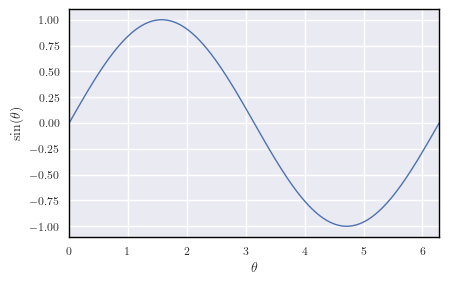

In [4]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

import numpy as np
import matplotlib.pyplot as plt

# Using seaborn's style
plt.style.use('seaborn')
width = 345
# width = 1000

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams.update(tex_fonts)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4

x = np.linspace(0, 2*np.pi, 100)
# Initialise figure instance
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
# Plot
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')



In [10]:
results_realnet2.transpose()

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
wiki elections,0.012461,0.027505,0.010724,0.072158,0.049625,0.065085,0.077725,0.684716,745129.0,75446.0,94933.0,0.794729,9285.0,20495.0,7991.0,53767.0,36977.0,48497.0,57915.0,510202.0
slashdot,0.012361,0.051867,0.014518,0.024771,0.020277,0.020386,0.029772,0.826048,1251925.0,221397.0,285003.0,0.776823,15475.0,64934.0,18176.0,31011.0,25385.0,25522.0,37272.0,1034150.0
epinions,0.007489,0.027010,0.004779,0.018902,0.024770,0.011846,0.029978,0.875227,10961993.0,583088.0,667110.0,0.874051,82094.0,296078.0,52385.0,207201.0,271534.0,129852.0,328616.0,9594233.0
sampson,0.108808,0.135579,0.128670,0.107945,0.194301,0.083765,0.081174,0.159758,1158.0,97.0,184.0,0.527174,126.0,157.0,149.0,125.0,225.0,97.0,94.0,185.0
bitcoin-alpha,0.003380,0.010715,0.006197,0.043627,0.028078,0.032912,0.034196,0.840896,88753.0,15739.0,16973.0,0.927296,300.0,951.0,550.0,3872.0,2492.0,2921.0,3035.0,74632.0
bitcoin-otc,0.004742,0.031147,0.011741,0.037097,0.034881,0.029805,0.030845,0.819742,125886.0,22098.0,24876.0,0.888326,597.0,3921.0,1478.0,4670.0,4391.0,3752.0,3883.0,103194.0
Congress mentions,0.000000,0.128114,0.103203,0.021352,0.092527,0.010676,0.003559,0.640569,281.0,0.0,0.0,0.000000,0.0,36.0,29.0,6.0,26.0,3.0,1.0,180.0


In [5]:
n2_triads = ["tr1", "tr2", "tr4"]
n1_triads = ["tr3", "tr5", "tr6"]
deg_triads = [*n1_triads, *n2_triads]
all_triads = ["tr" + str(i) for i in range(8)]

n1_triads = ['tr3', 'tr5', 'tr6']
n1_nohierarchical = 'tr5'
n2_triads = ['tr1', 'tr2', 'tr4']
n2_nonhierarchical = 'tr2'

triad_names_map={
    'tr7': 'BH0',
    'tr4': 'BH1',
    'tr1': 'BH2',
    'tr2': 'BN1',
    'tr0': 'UH2',
    'tr3': 'UH1',
    'tr5': 'UN1',
    'tr6': 'UH0',
}
triad_names_map.update({value: key for key, value in triad_names_map.items()})


In [12]:
fun_prepare_data = prepare_data4
triads_set = n2_triads
dd = fun_prepare_data(results_realnet2.transpose(),  triads_set)

vals = dd[0].transpose().tr2
inds = np.argsort(vals).values
inds
# results_realnet2.columns.values

array([2, 0, 4, 5, 1, 3, 6])

In [23]:
results_realnet2_s = results_realnet2#.iloc[:, inds]
results_realnet2_s = results_realnet2[['wiki elections', 'slashdot', 'epinions']]

In [24]:
n1_triads

['tr3', 'tr5', 'tr6']

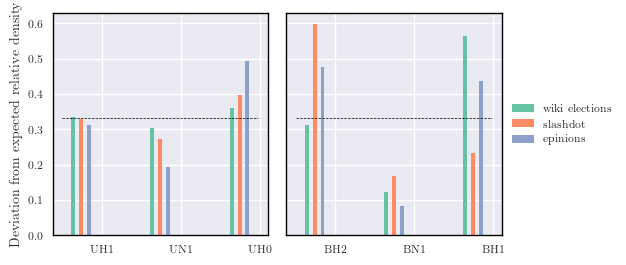

In [26]:
"""Many points
"""


save_ = False
fun_prepare_data = prepare_data4
linewidth = 0.5
addon = "_lvl"
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 7
add_real_data = False
show_error = False
show_rho = False

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
real_net_data, _ = fun_prepare_data(results_realnet2_s.transpose(),  triads_set)

labels = results_realnet2_s.columns.values
title = r'$\Delta_1$'
plot_bar_nets(axes[0], real_net_data, None, triads_set, None, labels = labels, 
              line_level = line_level, linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4)
            #   real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
real_net_data, _ = fun_prepare_data(results_realnet2_s.transpose(),  triads_set)

title = r'$\Delta_2$'

plot_bar_nets(axes[1], real_net_data, None, triads_set, None, 
              labels = labels, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.15, smallest_edge = True, m = 0.5, legend_elem = 4) 
            #   real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
# print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_realnets'
# fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

if show_error:
    fname = fname + "_err"
if add_real_data:
    fname = fname + "_real"
if show_rho:
    fname = fname + "_rho"

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 

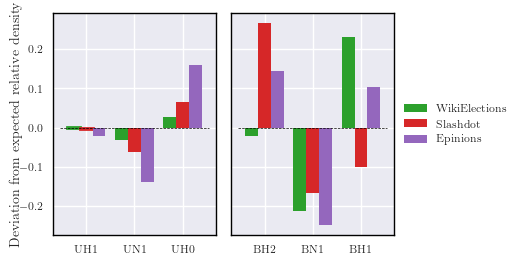

In [44]:
"""Many points
"""


save_ = True
fun_prepare_data = prepare_data5
linewidth = 0.5
addon = "_lvl"
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 7
add_real_data = False
show_error = False
show_rho = False

plot_param_total_width = 0.8
plot_param_single_width = 1.

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.2 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:20]
colors = sns.color_palette("tab10").as_hex()[2:5]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
real_net_data, _ = fun_prepare_data(results_realnet2_s.transpose(),  triads_set)

labels = results_realnet2_s.columns.values
labels = [r"WikiElections", r"Slashdot", r"Epinions"]
title = r'$\Delta_1$'
# plot_bar_nets(axes[0], real_net_data, None, triads_set, None, labels = labels, 
#               line_level = line_level, linewidth = linewidth, colors=colors, 
#               width = 0.25, smallest_edge = True, m = 0.3, legend_elem = 4)
plot_bar_nets2(axes[0], real_net_data, None, triads_set, None, labels = labels, 
              line_level = line_level, colors=colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,)
            #   real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
real_net_data, _ = fun_prepare_data(results_realnet2_s.transpose(),  triads_set)

title = r'$\Delta_2$'

# plot_bar_nets(axes[1], real_net_data, None, triads_set, None, 
#               labels = labels, line_level = line_level, 
#               linewidth = linewidth, colors=colors, 
#               width = 0.25, smallest_edge = True, m = 0.3, legend_elem = 4) 
#             #   real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)
plot_bar_nets2(axes[1], real_net_data, None, triads_set, None, labels = labels, 
              line_level = line_level, colors=colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,)

# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
# print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_3LargeOnline'
# fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

if show_error:
    fname = fname + "_err"
if add_real_data:
    fname = fname + "_real"
if show_rho:
    fname = fname + "_rho"
if fun_prepare_data == prepare_data5:
    fname = fname + "_around0"

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 

# Triadic influence Spanish schools

In [2]:
realnet2_path = Path('../../../triad-statistics/results_realnet2.h5')
results_realnet2 = pd.read_hdf(realnet2_path).transpose()

results_realnet2.drop(results_realnet2.index, inplace=True)
results_realnet2

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7


In [3]:
specific_schools = ["t11_10", "t11_9", "t11_8", "t11_7", "t11_6", "t11_5", "t11_4", "t11_3", "t11_2", "t11_1", "t1", "t2", "t6"]

path = Path('/home/pgorski/Desktop/data/spanish-highschools/')

arrays = [pd.read_pickle(path.joinpath("Triads_stats_" + school + ".pickle")) for school in specific_schools]
# dfs = pd.read.csv
# arrays
dfs = [pd.read_csv(path.joinpath("Triads_" + school + ".csv")) for school in specific_schools]


In [4]:
schools_all_nodes = [np.unique([*df.a, *df.b, *df.c]) for df in dfs]
schools_a_nodes = [np.unique(df.a) for df in dfs]

list(map(len, schools_a_nodes)), list(map(len, schools_all_nodes))
# len(schools_all_nodes), len(bo_a_nodes), len(ba_all_nodes), len(ba_a_nodes)

([372, 298, 191, 75, 103, 222, 109, 151, 488, 220, 290, 175, 483],
 [386, 318, 207, 80, 106, 223, 110, 156, 512, 232, 326, 202, 534])

In [5]:
schools_orig_agents_to_new_inds_dict = [{key: val for key, val in zip(school_all_nodes, list(range(0,len(school_all_nodes))))} for school_all_nodes in schools_all_nodes]

schools_n_agents = list(map(len, schools_all_nodes))
elist_schools = [{} for _ in schools_all_nodes]

every = 0.3
for i, (df, school_orig_agents_to_new_inds_dict) in enumerate(zip(dfs, schools_orig_agents_to_new_inds_dict)):
    start = every
    it = 0.
    rows = len(df.index)
    for ind, row in df.iterrows():
        ags = [row.a, row.b, row.c]
        ags = [school_orig_agents_to_new_inds_dict[ag] for ag in ags]
        links = [[ags[0], ags[1]], [ags[0], ags[2]], [ags[1], ags[2]] ]
        pols = [row.ab, row.ac, row.bc]
        for link, pol in zip(links, pols):
            elist_schools[i][(link[0], link[1])] = pol
        
        if it / rows > start:
            start += every
            print("Finished " + str(it/rows * 100) + "%.")
        it += 1
elist_schools

Finished 30.000979383967486%.
Finished 60.00195876793497%.
Finished 90.00048969198374%.
Finished 30.004943153732082%.
Finished 60.004943153732086%.
Finished 90.0%.
Finished 30.008034279592934%.
Finished 60.002678093197645%.
Finished 90.01071237279056%.
Finished 30.014025245441793%.
Finished 60.01051893408135%.
Finished 90.0070126227209%.
Finished 30.001068033749867%.
Finished 60.002136067499734%.
Finished 90.0032041012496%.
Finished 30.000271569399562%.
Finished 60.000543138799124%.
Finished 90.00081470819869%.
Finished 30.005191209551825%.
Finished 60.00173040318394%.
Finished 90.00692161273577%.
Finished 30.00218879959976%.
Finished 60.00125074262843%.
Finished 90.00031268565711%.
Finished 30.00122767172058%.
Finished 60.00092075379043%.
Finished 90.00061383586029%.
Finished 30.000585891727212%.
Finished 60.001171783454424%.
Finished 90.00175767518162%.
Finished 30.002185314685313%.
Finished 60.00218531468532%.
Finished 90.0%.
Finished 30.002052123948285%.
Finished 60.00410424789657%

[{(0, 74): -1,
  (0, 76): 1,
  (74, 76): 1,
  (0, 77): 1,
  (74, 77): 1,
  (0, 78): -1,
  (74, 78): 1,
  (0, 79): 1,
  (74, 79): 1,
  (0, 80): -1,
  (74, 80): 1,
  (0, 83): 1,
  (74, 83): 1,
  (0, 84): -1,
  (74, 84): 1,
  (0, 85): -1,
  (74, 85): 1,
  (0, 87): -1,
  (74, 87): 1,
  (0, 88): 1,
  (74, 88): 1,
  (0, 92): 1,
  (74, 92): 1,
  (76, 77): 1,
  (76, 80): 1,
  (77, 74): 1,
  (77, 76): 1,
  (77, 78): 1,
  (77, 79): 1,
  (77, 80): 1,
  (77, 83): 1,
  (77, 84): 1,
  (77, 85): 1,
  (77, 87): 1,
  (77, 88): 1,
  (0, 89): -1,
  (77, 89): 1,
  (77, 92): 1,
  (78, 74): 1,
  (78, 76): 1,
  (78, 77): 1,
  (78, 79): 1,
  (78, 80): 1,
  (78, 83): 1,
  (78, 84): 1,
  (78, 85): 1,
  (78, 87): 1,
  (78, 88): 1,
  (78, 89): 1,
  (78, 92): 1,
  (79, 78): 1,
  (79, 80): 1,
  (80, 76): 1,
  (80, 77): 1,
  (80, 78): 1,
  (80, 79): 1,
  (80, 83): -1,
  (83, 74): 1,
  (83, 76): 1,
  (83, 78): 1,
  (83, 79): -1,
  (83, 80): -1,
  (83, 84): 1,
  (83, 85): 1,
  (83, 87): -1,
  (83, 88): 1,
  (83, 89): 

In [6]:
list(map(len, elist_schools)), [sum(np.array(list(elist.values())) > 0) for elist in elist_schools], [sum(np.array(list(elist.values())) < 0) for elist in elist_schools]

([6116,
  3863,
  1831,
  1040,
  1637,
  3767,
  1436,
  3101,
  8909,
  4186,
  5894,
  3011,
  12777],
 [4116, 3039, 1561, 789, 1354, 2894, 956, 1853, 6624, 3183, 5061, 2717, 10993],
 [2000, 824, 270, 251, 283, 873, 480, 1248, 2285, 1003, 833, 294, 1784])

In [7]:
# testing if values are correct 
n_arr2 = np.array([0] * 8)
for ind, triad in dfs[0].iterrows():
    
    values = triad.values[3:]
    connections_values = [0 if cv < 0 else 1 for cv in values]
    n_arr2[connections_values[0]*4 + connections_values[2]*2 + connections_values[1]] += 1
n_arr2, arrays[0]

(array([ 2659,  7058,  1259,  2171,  2658,  2297,  3277, 19463]),
 [2659, 7058, 1259, 2171, 2658, 2297, 3277, 19463])

In [8]:
for school_i, school in enumerate(specific_schools):
    n_arr_st = arrays[school_i]

    return_dict_st = {}
    for i in range(8):
        return_dict_st[f'Tr{i}'] = n_arr_st[i]
        return_dict_st[f'tr{i}'] = n_arr_st[i] / sum(n_arr_st)

    return_dict_st['T'] = sum(n_arr_st)
    return_dict_st['L_plus'] = sum(np.array(list(elist_schools[school_i].values())) > 0)
    return_dict_st['L'] = len(elist_schools[school_i])
    return_dict_st['rho'] = sum(np.array(list(elist_schools[school_i].values())) > 0) / len(elist_schools[school_i])
    
    results_realnet2 = results_realnet2.append(return_dict_st, ignore_index=True)

results_realnet2

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
0,0.065105,0.172812,0.030826,0.053156,0.065080,0.056241,0.080236,0.476544,40842.0,4116.0,6116.0,0.672989,2659.0,7058.0,1259.0,2171.0,2658.0,2297.0,3277.0,19463.0
1,0.025062,0.079288,0.018043,0.051607,0.030351,0.048245,0.072664,0.674740,20230.0,3039.0,3863.0,0.786694,507.0,1604.0,365.0,1044.0,614.0,976.0,1470.0,13650.0
2,0.007097,0.037092,0.010712,0.044055,0.022228,0.042046,0.074317,0.762453,7468.0,1561.0,1831.0,0.852540,53.0,277.0,80.0,329.0,166.0,314.0,555.0,5694.0
3,0.015603,0.117812,0.019109,0.049965,0.036466,0.053471,0.069425,0.638149,5704.0,789.0,1040.0,0.758654,89.0,672.0,109.0,285.0,208.0,305.0,396.0,3640.0
4,0.006301,0.030546,0.013564,0.057033,0.024672,0.050518,0.075937,0.741429,9363.0,1354.0,1637.0,0.827123,59.0,286.0,127.0,534.0,231.0,473.0,711.0,6942.0
5,0.023246,0.093529,0.025012,0.058116,0.046004,0.057573,0.069875,0.626646,36823.0,2894.0,3767.0,0.768251,856.0,3444.0,921.0,2140.0,1694.0,2120.0,2573.0,23075.0
6,0.035819,0.105468,0.082367,0.074234,0.117927,0.064631,0.081762,0.437792,11558.0,956.0,1436.0,0.665738,414.0,1219.0,952.0,858.0,1363.0,747.0,945.0,5060.0
7,0.107908,0.217629,0.057409,0.058973,0.081799,0.060129,0.073419,0.342735,31981.0,1853.0,3101.0,0.597549,3451.0,6960.0,1836.0,1886.0,2616.0,1923.0,2348.0,10961.0
8,0.045516,0.120235,0.028543,0.051624,0.043321,0.046268,0.084970,0.579522,65164.0,6624.0,8909.0,0.743518,2966.0,7835.0,1860.0,3364.0,2823.0,3015.0,5537.0,37764.0
9,0.032136,0.093450,0.029939,0.059585,0.036120,0.054049,0.084281,0.610441,34136.0,3183.0,4186.0,0.760392,1097.0,3190.0,1022.0,2034.0,1233.0,1845.0,2877.0,20838.0


In [9]:
results_realnet2['school'] = specific_schools
results_realnet2.set_index('school', inplace = True)

In [10]:
results_realnet2

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
school,,,,,,,,,,,,,,,,,,,,
t11_10,0.065105,0.172812,0.030826,0.053156,0.065080,0.056241,0.080236,0.476544,40842.0,4116.0,6116.0,0.672989,2659.0,7058.0,1259.0,2171.0,2658.0,2297.0,3277.0,19463.0
t11_9,0.025062,0.079288,0.018043,0.051607,0.030351,0.048245,0.072664,0.674740,20230.0,3039.0,3863.0,0.786694,507.0,1604.0,365.0,1044.0,614.0,976.0,1470.0,13650.0
t11_8,0.007097,0.037092,0.010712,0.044055,0.022228,0.042046,0.074317,0.762453,7468.0,1561.0,1831.0,0.852540,53.0,277.0,80.0,329.0,166.0,314.0,555.0,5694.0
t11_7,0.015603,0.117812,0.019109,0.049965,0.036466,0.053471,0.069425,0.638149,5704.0,789.0,1040.0,0.758654,89.0,672.0,109.0,285.0,208.0,305.0,396.0,3640.0
t11_6,0.006301,0.030546,0.013564,0.057033,0.024672,0.050518,0.075937,0.741429,9363.0,1354.0,1637.0,0.827123,59.0,286.0,127.0,534.0,231.0,473.0,711.0,6942.0
t11_5,0.023246,0.093529,0.025012,0.058116,0.046004,0.057573,0.069875,0.626646,36823.0,2894.0,3767.0,0.768251,856.0,3444.0,921.0,2140.0,1694.0,2120.0,2573.0,23075.0
t11_4,0.035819,0.105468,0.082367,0.074234,0.117927,0.064631,0.081762,0.437792,11558.0,956.0,1436.0,0.665738,414.0,1219.0,952.0,858.0,1363.0,747.0,945.0,5060.0
t11_3,0.107908,0.217629,0.057409,0.058973,0.081799,0.060129,0.073419,0.342735,31981.0,1853.0,3101.0,0.597549,3451.0,6960.0,1836.0,1886.0,2616.0,1923.0,2348.0,10961.0
t11_2,0.045516,0.120235,0.028543,0.051624,0.043321,0.046268,0.084970,0.579522,65164.0,6624.0,8909.0,0.743518,2966.0,7835.0,1860.0,3364.0,2823.0,3015.0,5537.0,37764.0


In [11]:
realnet2_path = Path('../../../triad-statistics/results_realnet_spanish.h5')

results_realnet2.to_hdf(realnet2_path, key = 'results_realnet2')

In [17]:
realnet2_path = Path('../../../triad-statistics/results_realnet_spanish.h5')

results_realnet2 = pd.read_hdf(realnet2_path)#.transpose()

results_realnet2

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
school,,,,,,,,,,,,,,,,,,,,
t11_10,0.065105,0.172812,0.030826,0.053156,0.065080,0.056241,0.080236,0.476544,40842.0,4116.0,6116.0,0.672989,2659.0,7058.0,1259.0,2171.0,2658.0,2297.0,3277.0,19463.0
t11_9,0.025062,0.079288,0.018043,0.051607,0.030351,0.048245,0.072664,0.674740,20230.0,3039.0,3863.0,0.786694,507.0,1604.0,365.0,1044.0,614.0,976.0,1470.0,13650.0
t11_8,0.007097,0.037092,0.010712,0.044055,0.022228,0.042046,0.074317,0.762453,7468.0,1561.0,1831.0,0.852540,53.0,277.0,80.0,329.0,166.0,314.0,555.0,5694.0
t11_7,0.015603,0.117812,0.019109,0.049965,0.036466,0.053471,0.069425,0.638149,5704.0,789.0,1040.0,0.758654,89.0,672.0,109.0,285.0,208.0,305.0,396.0,3640.0
t11_6,0.006301,0.030546,0.013564,0.057033,0.024672,0.050518,0.075937,0.741429,9363.0,1354.0,1637.0,0.827123,59.0,286.0,127.0,534.0,231.0,473.0,711.0,6942.0
t11_5,0.023246,0.093529,0.025012,0.058116,0.046004,0.057573,0.069875,0.626646,36823.0,2894.0,3767.0,0.768251,856.0,3444.0,921.0,2140.0,1694.0,2120.0,2573.0,23075.0
t11_4,0.035819,0.105468,0.082367,0.074234,0.117927,0.064631,0.081762,0.437792,11558.0,956.0,1436.0,0.665738,414.0,1219.0,952.0,858.0,1363.0,747.0,945.0,5060.0
t11_3,0.107908,0.217629,0.057409,0.058973,0.081799,0.060129,0.073419,0.342735,31981.0,1853.0,3101.0,0.597549,3451.0,6960.0,1836.0,1886.0,2616.0,1923.0,2348.0,10961.0
t11_2,0.045516,0.120235,0.028543,0.051624,0.043321,0.046268,0.084970,0.579522,65164.0,6624.0,8909.0,0.743518,2966.0,7835.0,1860.0,3364.0,2823.0,3015.0,5537.0,37764.0


In [15]:
results_realnet2

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
school,,,,,,,,,,,,,,,,,,,,
t11_10,0.065105,0.172812,0.030826,0.053156,0.065080,0.056241,0.080236,0.476544,40842.0,4116.0,6116.0,0.672989,2659.0,7058.0,1259.0,2171.0,2658.0,2297.0,3277.0,19463.0
t11_9,0.025062,0.079288,0.018043,0.051607,0.030351,0.048245,0.072664,0.674740,20230.0,3039.0,3863.0,0.786694,507.0,1604.0,365.0,1044.0,614.0,976.0,1470.0,13650.0
t11_8,0.007097,0.037092,0.010712,0.044055,0.022228,0.042046,0.074317,0.762453,7468.0,1561.0,1831.0,0.852540,53.0,277.0,80.0,329.0,166.0,314.0,555.0,5694.0
t11_7,0.015603,0.117812,0.019109,0.049965,0.036466,0.053471,0.069425,0.638149,5704.0,789.0,1040.0,0.758654,89.0,672.0,109.0,285.0,208.0,305.0,396.0,3640.0
t11_6,0.006301,0.030546,0.013564,0.057033,0.024672,0.050518,0.075937,0.741429,9363.0,1354.0,1637.0,0.827123,59.0,286.0,127.0,534.0,231.0,473.0,711.0,6942.0
t11_5,0.023246,0.093529,0.025012,0.058116,0.046004,0.057573,0.069875,0.626646,36823.0,2894.0,3767.0,0.768251,856.0,3444.0,921.0,2140.0,1694.0,2120.0,2573.0,23075.0
t11_4,0.035819,0.105468,0.082367,0.074234,0.117927,0.064631,0.081762,0.437792,11558.0,956.0,1436.0,0.665738,414.0,1219.0,952.0,858.0,1363.0,747.0,945.0,5060.0
t11_3,0.107908,0.217629,0.057409,0.058973,0.081799,0.060129,0.073419,0.342735,31981.0,1853.0,3101.0,0.597549,3451.0,6960.0,1836.0,1886.0,2616.0,1923.0,2348.0,10961.0
t11_2,0.045516,0.120235,0.028543,0.051624,0.043321,0.046268,0.084970,0.579522,65164.0,6624.0,8909.0,0.743518,2966.0,7835.0,1860.0,3364.0,2823.0,3015.0,5537.0,37764.0


In [18]:
fun_prepare_data = prepare_data4
triads_set = n2_triads
dd = fun_prepare_data(results_realnet2,  triads_set)

vals = dd[0].transpose().tr2
inds = np.argsort(vals).values
inds

# results_realnet2_s = results_realnet2.iloc[:, inds]

array([10, 11,  3,  0,  1,  8,  5,  2, 12,  7,  9,  4,  6])

In [22]:
tableau20 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
             '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
             '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
             '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5']

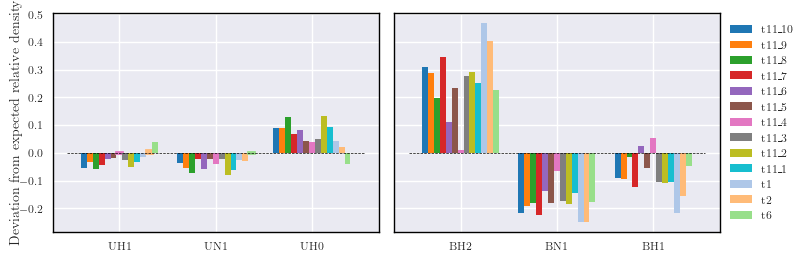

In [25]:
"""Many points
"""


save_ = True
fun_prepare_data = prepare_data5
linewidth = 0.5
addon = "_lvl"
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_size = 14
add_real_data = False
show_error = False
show_rho = False

plot_param_total_width = 0.8
plot_param_single_width = 1.

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = tableau20#sns.color_palette("Set2").as_hex()[:20]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
real_net_data, _ = fun_prepare_data(results_realnet2,  triads_set)
real_net_data = real_net_data[real_net_data.columns[group_size*which_group:group_size*(which_group+1)]]

# labels = results_realnet2_s.columns.values
labels = results_realnet2.index.values[group_size*which_group:group_size*(which_group+1)]
title = r'$\Delta_1$'
# plot_bar_nets(axes[0], real_net_data, None, triads_set, None, labels = labels, 
#               line_level = line_level, linewidth = linewidth, colors=colors, 
#               width = 0.1, smallest_edge = True, m = 0.5, legend_elem = 4)
            #   real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)
plot_bar_nets2(axes[0], real_net_data, None, triads_set, None, labels = labels,
              line_level = line_level, colors=colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,)

# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
real_net_data, _ = fun_prepare_data(results_realnet2,  triads_set)
real_net_data = real_net_data[real_net_data.columns[group_size*which_group:group_size*(which_group+1)]]

title = r'$\Delta_2$'

# plot_bar_nets(axes[1], real_net_data, None, triads_set, None, 
#               labels = labels, line_level = line_level, 
#               linewidth = linewidth, colors=colors, 
#               width = 0.1, smallest_edge = True, m = 0.5, legend_elem = 4) 
#             #   real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)
plot_bar_nets2(axes[1], real_net_data, None, triads_set, None, labels = labels,
              line_level = line_level, colors=colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
# print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_spanish_high2'
# fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

if show_error:
    fname = fname + "_err"
if add_real_data:
    fname = fname + "_real"
if show_rho:
    fname = fname + "_rho"

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 

In [58]:
real_net_data

school,t11_10,t11_9,t11_8,t11_7,t11_6,t11_5,t11_4,t11_3,t11_2,t11_1,t1,t2,t6
tr1,0.643098,0.620983,0.529637,0.679474,0.444099,0.568411,0.344935,0.609884,0.625899,0.585859,0.800381,0.737864,0.561080
tr2,0.114715,0.141309,0.152964,0.110212,0.197205,0.152005,0.269383,0.160883,0.148586,0.187695,0.082047,0.082898,0.154543
tr4,0.242187,0.237708,0.317400,0.210313,0.358696,0.279584,0.385682,0.229232,0.225515,0.226446,0.117572,0.179238,0.284377


# Specific classes stats

In [48]:
realnet2_path = Path('../../../triad-statistics/results_realnet2.h5')
results_realnet2 = pd.read_hdf(realnet2_path).transpose()

results_realnet2.drop(results_realnet2.index, inplace=True)
results_realnet2

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7


In [49]:
specific_schools = ["t11_10", "t11_9", "t11_8", "t11_7", "t11_6", "t11_5", "t11_4", "t11_3", "t11_2", "t11_1", "t1", "t2", "t6"]

path = Path('/home/pgorski/Desktop/data/spanish-highschools/')

arrays = []
datanames = []
dfs = []
for school in specific_schools:
    i = 1
    while True:
        if not os.path.isfile(path.joinpath("Triads_stats_" + school + "_" + str(i) + ".pickle")):
            break
        array = pd.read_pickle(path.joinpath("Triads_stats_" + school + "_" + str(i) + ".pickle"))
        arrays.append(array)
        datanames.append(school + "_" + str(i))
        dfs.append(pd.read_csv(path.joinpath("Triads_" + school + "_" + str(i) + ".csv")))
        i += 1



In [50]:
schools_all_nodes = [np.unique([*df.a, *df.b, *df.c]) for df in dfs]
schools_a_nodes = [np.unique(df.a) for df in dfs]

# list(map(len, schools_a_nodes)), 
list(map(len, schools_all_nodes))
# len(schools_all_nodes), len(bo_a_nodes), len(ba_all_nodes), len(ba_a_nodes)

[94,
 98,
 99,
 95,
 67,
 94,
 75,
 82,
 52,
 67,
 47,
 41,
 52,
 59,
 56,
 56,
 29,
 27,
 28,
 26,
 73,
 83,
 114,
 155,
 118,
 125,
 107,
 125]

In [51]:
schools_orig_agents_to_new_inds_dict = [{key: val for key, val in zip(school_all_nodes, list(range(0,len(school_all_nodes))))} for school_all_nodes in schools_all_nodes]

schools_n_agents = list(map(len, schools_all_nodes))
elist_schools = [{} for _ in schools_all_nodes]

every = 0.6
for i, (df, school_orig_agents_to_new_inds_dict) in enumerate(zip(dfs, schools_orig_agents_to_new_inds_dict)):
    start = every
    it = 0.
    rows = len(df.index)
    for ind, row in df.iterrows():
        ags = [row.a, row.b, row.c]
        ags = [school_orig_agents_to_new_inds_dict[ag] for ag in ags]
        links = [[ags[0], ags[1]], [ags[0], ags[2]], [ags[1], ags[2]] ]
        pols = [row.ab, row.ac, row.bc]
        for link, pol in zip(links, pols):
            elist_schools[i][(link[0], link[1])] = pol
        
        if it / rows > start:
            start += every
            print("Finished " + str(it/rows * 100) + "%.")
        it += 1
elist_schools

Finished 60.00208376745155%.
Finished 60.00281968137601%.
Finished 60.006273525721454%.
Finished 60.00800640512411%.
Finished 60.007624857033925%.
Finished 60.00792707094729%.
Finished 60.031496062992126%.
Finished 60.02358490566038%.
Finished 60.019455252918284%.
Finished 60.00903750564844%.
Finished 60.034602076124564%.
Finished 60.09852216748769%.
Finished 60.010628404410795%.
Finished 60.00180050414116%.
Finished 60.004232356364405%.
Finished 60.009156461027814%.
Finished 60.02490660024906%.
Finished 60.00526592943655%.
Finished 60.02522068095839%.
Finished 60.029069767441854%.
Finished 60.00662416162954%.
Finished 60.003014469453376%.
Finished 60.012928248222366%.
Finished 60.001724683089485%.
Finished 60.006381111908745%.
Finished 60.00197961001683%.
Finished 60.005297311614356%.
Finished 60.00376151965394%.


[{(0, 74): -1,
  (0, 76): 1,
  (74, 76): 1,
  (0, 77): 1,
  (74, 77): 1,
  (0, 78): -1,
  (74, 78): 1,
  (0, 79): 1,
  (74, 79): 1,
  (0, 80): -1,
  (74, 80): 1,
  (0, 83): 1,
  (74, 83): 1,
  (0, 84): -1,
  (74, 84): 1,
  (0, 85): -1,
  (74, 85): 1,
  (0, 87): -1,
  (74, 87): 1,
  (0, 88): 1,
  (74, 88): 1,
  (0, 92): 1,
  (74, 92): 1,
  (76, 77): 1,
  (76, 80): 1,
  (77, 74): 1,
  (77, 76): 1,
  (77, 78): 1,
  (77, 79): 1,
  (77, 80): 1,
  (77, 83): 1,
  (77, 84): 1,
  (77, 85): 1,
  (77, 87): 1,
  (77, 88): 1,
  (0, 89): -1,
  (77, 89): 1,
  (77, 92): 1,
  (78, 74): 1,
  (78, 76): 1,
  (78, 77): 1,
  (78, 79): 1,
  (78, 80): 1,
  (78, 83): 1,
  (78, 84): 1,
  (78, 85): 1,
  (78, 87): 1,
  (78, 88): 1,
  (78, 89): 1,
  (78, 92): 1,
  (79, 78): 1,
  (79, 80): 1,
  (80, 76): 1,
  (80, 77): 1,
  (80, 78): 1,
  (80, 79): 1,
  (80, 83): -1,
  (83, 74): 1,
  (83, 76): 1,
  (83, 78): 1,
  (83, 79): -1,
  (83, 80): -1,
  (83, 84): 1,
  (83, 85): 1,
  (83, 87): -1,
  (83, 88): 1,
  (83, 89): 

In [52]:
list(map(len, elist_schools)), [sum(np.array(list(elist.values())) > 0) for elist in elist_schools], [sum(np.array(list(elist.values())) < 0) for elist in elist_schools]

([1486,
  1760,
  1545,
  1325,
  838,
  1309,
  782,
  934,
  568,
  599,
  356,
  308,
  799,
  1093,
  957,
  918,
  394,
  396,
  377,
  269,
  1304,
  1797,
  1554,
  3696,
  1923,
  1736,
  1413,
  2773],
 [1169,
  1134,
  927,
  886,
  689,
  989,
  544,
  817,
  500,
  503,
  280,
  278,
  599,
  885,
  692,
  718,
  243,
  271,
  245,
  197,
  775,
  1078,
  1313,
  2659,
  1338,
  1314,
  1142,
  2041],
 [317,
  626,
  618,
  439,
  149,
  320,
  238,
  117,
  68,
  96,
  76,
  30,
  200,
  208,
  265,
  200,
  151,
  125,
  132,
  72,
  529,
  719,
  241,
  1037,
  585,
  422,
  271,
  732])

In [53]:
# testing if values are correct 
n_arr2 = np.array([0] * 8)
for ind, triad in dfs[0].iterrows():
    
    values = triad.values[3:]
    connections_values = [0 if cv < 0 else 1 for cv in values]
    n_arr2[connections_values[0]*4 + connections_values[2]*2 + connections_values[1]] += 1
n_arr2, arrays[0]

(array([ 170,  703,  163,  626,  375,  543,  964, 6054]),
 [170, 703, 163, 626, 375, 543, 964, 6054])

In [54]:
for school_i, school in enumerate(datanames):
    n_arr_st = arrays[school_i]

    return_dict_st = {}
    for i in range(8):
        return_dict_st[f'Tr{i}'] = n_arr_st[i]
        return_dict_st[f'tr{i}'] = n_arr_st[i] / sum(n_arr_st)

    return_dict_st['T'] = sum(n_arr_st)
    return_dict_st['L_plus'] = sum(np.array(list(elist_schools[school_i].values())) > 0)
    return_dict_st['L'] = len(elist_schools[school_i])
    return_dict_st['rho'] = sum(np.array(list(elist_schools[school_i].values())) > 0) / len(elist_schools[school_i])
    
    results_realnet2 = results_realnet2.append(return_dict_st, ignore_index=True)

results_realnet2

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
0,0.017712,0.073244,0.016983,0.065222,0.039071,0.056574,0.100438,0.630756,9598.0,1169.0,1486.0,0.786676,170.0,703.0,163.0,626.0,375.0,543.0,964.0,6054.0
1,0.074722,0.193853,0.035317,0.054420,0.075708,0.071620,0.093684,0.400677,14186.0,1134.0,1760.0,0.644318,1060.0,2750.0,501.0,772.0,1074.0,1016.0,1329.0,5684.0
2,0.105604,0.256378,0.041092,0.052175,0.062526,0.050293,0.056880,0.375052,9564.0,927.0,1545.0,0.600000,1010.0,2452.0,393.0,499.0,598.0,481.0,544.0,3587.0
3,0.055911,0.153856,0.026955,0.036563,0.081532,0.034294,0.058714,0.552175,7494.0,886.0,1325.0,0.668679,419.0,1153.0,202.0,274.0,611.0,257.0,440.0,4138.0
4,0.010484,0.037934,0.014678,0.047846,0.024400,0.060999,0.074914,0.728746,5246.0,689.0,838.0,0.822196,55.0,199.0,77.0,251.0,128.0,320.0,393.0,3823.0
5,0.029462,0.084423,0.030255,0.062360,0.035408,0.054565,0.091822,0.611706,7569.0,989.0,1309.0,0.755539,223.0,639.0,229.0,472.0,268.0,413.0,695.0,4630.0
6,0.065827,0.201575,0.013228,0.052283,0.043465,0.040945,0.070236,0.512441,3175.0,544.0,782.0,0.695652,209.0,640.0,42.0,166.0,138.0,130.0,223.0,1627.0
7,0.004717,0.029717,0.004009,0.036557,0.018868,0.026651,0.037500,0.841981,4240.0,817.0,934.0,0.874732,20.0,126.0,17.0,155.0,80.0,113.0,159.0,3570.0
8,0.003891,0.026265,0.005512,0.036641,0.011997,0.040856,0.088197,0.786641,3084.0,500.0,568.0,0.880282,12.0,81.0,17.0,113.0,37.0,126.0,272.0,2426.0
9,0.004971,0.049254,0.010845,0.029372,0.023949,0.044736,0.061455,0.775418,2213.0,503.0,599.0,0.839733,11.0,109.0,24.0,65.0,53.0,99.0,136.0,1716.0


In [55]:
results_realnet2['school_class'] = datanames
results_realnet2.set_index('school_class', inplace = True)

In [56]:
results_realnet2

,tr0,tr1,tr2,tr3,tr4,tr5,tr6,tr7,T,L_plus,L,rho,Tr0,Tr1,Tr2,Tr3,Tr4,Tr5,Tr6,Tr7
school_class,,,,,,,,,,,,,,,,,,,,
t11_10_1,0.017712,0.073244,0.016983,0.065222,0.039071,0.056574,0.100438,0.630756,9598.0,1169.0,1486.0,0.786676,170.0,703.0,163.0,626.0,375.0,543.0,964.0,6054.0
t11_10_2,0.074722,0.193853,0.035317,0.054420,0.075708,0.071620,0.093684,0.400677,14186.0,1134.0,1760.0,0.644318,1060.0,2750.0,501.0,772.0,1074.0,1016.0,1329.0,5684.0
t11_10_3,0.105604,0.256378,0.041092,0.052175,0.062526,0.050293,0.056880,0.375052,9564.0,927.0,1545.0,0.600000,1010.0,2452.0,393.0,499.0,598.0,481.0,544.0,3587.0
t11_10_4,0.055911,0.153856,0.026955,0.036563,0.081532,0.034294,0.058714,0.552175,7494.0,886.0,1325.0,0.668679,419.0,1153.0,202.0,274.0,611.0,257.0,440.0,4138.0
t11_9_1,0.010484,0.037934,0.014678,0.047846,0.024400,0.060999,0.074914,0.728746,5246.0,689.0,838.0,0.822196,55.0,199.0,77.0,251.0,128.0,320.0,393.0,3823.0
t11_9_2,0.029462,0.084423,0.030255,0.062360,0.035408,0.054565,0.091822,0.611706,7569.0,989.0,1309.0,0.755539,223.0,639.0,229.0,472.0,268.0,413.0,695.0,4630.0
t11_9_3,0.065827,0.201575,0.013228,0.052283,0.043465,0.040945,0.070236,0.512441,3175.0,544.0,782.0,0.695652,209.0,640.0,42.0,166.0,138.0,130.0,223.0,1627.0
t11_9_4,0.004717,0.029717,0.004009,0.036557,0.018868,0.026651,0.037500,0.841981,4240.0,817.0,934.0,0.874732,20.0,126.0,17.0,155.0,80.0,113.0,159.0,3570.0
t11_8_1,0.003891,0.026265,0.005512,0.036641,0.011997,0.040856,0.088197,0.786641,3084.0,500.0,568.0,0.880282,12.0,81.0,17.0,113.0,37.0,126.0,272.0,2426.0


In [57]:
realnet2_path = Path('../../../triad-statistics/results_realnet_spanish_class.h5')

results_realnet2.to_hdf(realnet2_path, key = 'results_realnet2')

In [6]:
realnet2_path = Path('../../../triad-statistics/results_realnet_spanish_class.h5')

results_realnet2 = pd.read_hdf(realnet2_path).transpose()

In [7]:
fun_prepare_data = prepare_data4
triads_set = n2_triads
dd = fun_prepare_data(results_realnet2,  triads_set)

vals = dd[0].transpose().tr2
inds = np.argsort(vals).values
inds

# results_realnet2_s = results_realnet2.iloc[:, inds]

KeyError: "None of [Index(['tr1', 'tr2', 'tr4'], dtype='object', name='school_class')] are in the [columns]"

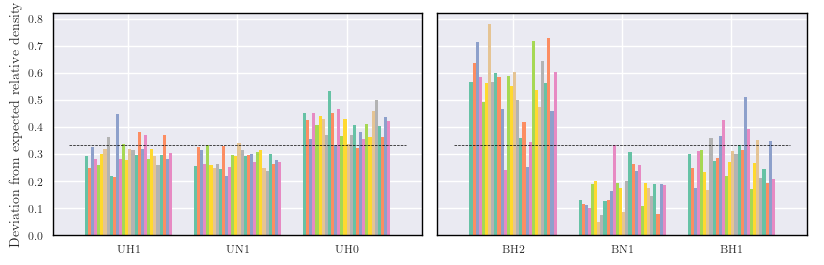

In [ ]:
"""Many points
"""


save_ = False
fun_prepare_data = prepare_data4
linewidth = 0.5
addon = "_lvl"
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_sizes = [28,8,8]
add_real_data = False
show_error = False
show_rho = False

plot_param_total_width = 0.8
plot_param_single_width = 1.

dataset_start = sum(group_sizes[0:which_group])
dataset_end = sum(group_sizes[0:which_group+1])

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:30]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
real_net_data, _ = fun_prepare_data(results_realnet2,  triads_set)
real_net_data = real_net_data[real_net_data.columns[dataset_start:dataset_end]]

# labels = results_realnet2_s.columns.values
labels = results_realnet2.index.values[dataset_start:dataset_end]
title = r'$\Delta_1$'
# plot_bar_nets(axes[0], real_net_data, None, triads_set, None, labels = labels, 
#               line_level = line_level, linewidth = linewidth, colors=colors, 
#               width = 0.1, smallest_edge = True, m = 0.5, legend_elem = 4)
plot_bar_nets2(axes[0], real_net_data, None, triads_set, None, labels = labels,
              line_level = line_level, colors=colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,)

            #   real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
real_net_data, _ = fun_prepare_data(results_realnet2,  triads_set)
real_net_data = real_net_data[real_net_data.columns[dataset_start:dataset_end]]

title = r'$\Delta_2$'

# plot_bar_nets(axes[1], real_net_data, None, triads_set, None, 
#               labels = labels, line_level = line_level, 
#               linewidth = linewidth, colors=colors, 
#               width = 0.1, smallest_edge = True, m = 0.5, legend_elem = 4) 
#             #   real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)
plot_bar_nets2(axes[1], real_net_data, None, triads_set, None, labels = labels,
              line_level = line_level, colors=colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    # if i==1:
    #     axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
# print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_spanish_high_class'
# fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

if show_error:
    fname = fname + "_err"
if add_real_data:
    fname = fname + "_real"
if show_rho:
    fname = fname + "_rho"

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 

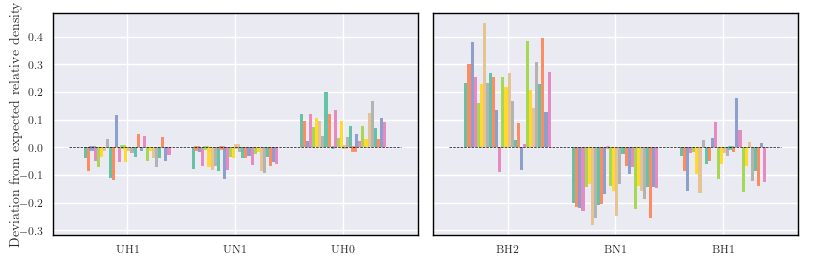

In [76]:
"""Many points
"""


save_ = True
fun_prepare_data = prepare_data5
linewidth = 0.5
addon = "_lvl"
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 0 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_sizes = [28,8,8]
add_real_data = False
show_error = False
show_rho = False

plot_param_total_width = 0.8
plot_param_single_width = 1.

dataset_start = sum(group_sizes[0:which_group])
dataset_end = sum(group_sizes[0:which_group+1])

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:30]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
real_net_data, _ = fun_prepare_data(results_realnet2,  triads_set)
real_net_data = real_net_data[real_net_data.columns[dataset_start:dataset_end]]

# labels = results_realnet2_s.columns.values
labels = results_realnet2.index.values[dataset_start:dataset_end]
title = r'$\Delta_1$'
# plot_bar_nets(axes[0], real_net_data, None, triads_set, None, labels = labels, 
#               line_level = line_level, linewidth = linewidth, colors=colors, 
#               width = 0.1, smallest_edge = True, m = 0.5, legend_elem = 4)
plot_bar_nets2(axes[0], real_net_data, None, triads_set, None, labels = labels,
              line_level = line_level, colors=colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,)

            #   real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
real_net_data, _ = fun_prepare_data(results_realnet2,  triads_set)
real_net_data = real_net_data[real_net_data.columns[dataset_start:dataset_end]]

title = r'$\Delta_2$'

# plot_bar_nets(axes[1], real_net_data, None, triads_set, None, 
#               labels = labels, line_level = line_level, 
#               linewidth = linewidth, colors=colors, 
#               width = 0.1, smallest_edge = True, m = 0.5, legend_elem = 4) 
#             #   real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)
plot_bar_nets2(axes[1], real_net_data, None, triads_set, None, labels = labels,
              line_level = line_level, colors=colors, linewidth = linewidth,
              smallest_edge = True,
              total_width=plot_param_total_width, single_width=plot_param_single_width,)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    # if i==1:
    #     axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
# print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_spanish_high_class_all'
# fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

if fun_prepare_data == prepare_data5:
    fname = fname + "_around0"

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 